# Jaccard Threshold Parameter

Depending on the amount of barcoded virus infecting cells and the amount of cells targeted, cells will end up having more or less incorporated barcodes to the cells and barcodes might be non-unique labelling if too many barcodes are incorporated and/or too many cells are targeted. Also, depending on the sequencing, we might have more or less barcode dropout, doublets being including, etc. All these factors affect clone reconstruction.

Examples:
- If a progenitor had 3 barcodes incorporated, and then we have one or two dropouts when sequencing progeny, we will only identify them as part of the clone if the Jaccard Threshold is below 0.3 (1 out of 3) or 0.6 (2 out of 3).
- If there are doublets or contamination, a very low Jaccard Threshold will bridge clones together by these cells.

## Proposed Comparison

Let's begin by selecting one of the five datasets and then looking into the biggest (or several biggest) clones to see how much barcode sharing is happenning and if they are being bridged by a couple cells (should be identified by TREX). We should also look into how many single celled clones appear as these might increase when increasing Jaccard Threshold.

In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np

from trex.quality_control import read_clone_ids, read_umi_count_matrix, plot_discrete_histogram, jaccard_similarity_matrix, plot_jaccard_matrix

In [2]:
DATA_DIR = pathlib.Path("results/full_sweep/")

In [3]:
datasets = ["20240214_T1_1001"] + ["20240214_T2_100%s" % str(this) for this in range(1, 5)]
jaccards = {str(value): value/10 for value in range(1, 11)}

In [4]:
this_data_dir = DATA_DIR / "_".join([datasets[3], "3", "output"])
clones_df = read_clone_ids(this_data_dir)

<Axes: >

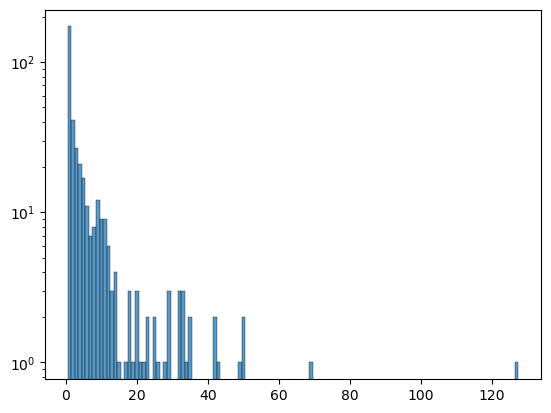

In [5]:
plot_discrete_histogram(clones_df.clone_nr.value_counts())

In [6]:
selected_cell_ids = clones_df.query(f"clone_nr == {clones_df.clone_nr.value_counts().index[0]}").cell_id.values

In [7]:
umi_df = read_umi_count_matrix(this_data_dir)

In [8]:
selected_umi_df = umi_df[selected_cell_ids]
selected_umi_df = selected_umi_df.loc[~(selected_umi_df==0).all(axis=1)]
selected_umi_df

,AAAGAACCAAGATGTA,AAAGTCCAGTAGAATC,AACCAACCACGGTCTG,AAGTACCAGCAAGTCG,AATGAAGTCAATGTCG,AATGAAGTCGCGTGAC,AATTTCCGTCATCCGG,ACAAGCTGTGTTTACG,ACCTACCCAAGGTCGA,ACCTGAAGTATATGGA,...,TGTGGCGTCCACATAG,TTAGGCATCACTTTGT,TTAGGGTGTGGTCTCG,TTCACCGGTCTGTTAG,TTCCGGTTCTATTCGT,TTCTTGATCAAGTAAG,TTGCATTCAGCTACCG,TTGCCTGGTCCTCCAT,TTTCACAGTAAGGTCG,TTTCCTCCAGGCGATA
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
-----------------ACCGCAACCACAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
--------------CTCACCGCAACCACAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
------GTGGGTTGCAAGGGATGATGTACC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
----CTAGAACGTGGGTTGCAAGGGAGTAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGACTTTCACTCGTAAAGATGCCATCCGTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
CTAGAACGTGGGTCTCTCTGGTTAGACCAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CTAGAACGTGGGTTGCAAGGGATGATGTAC,29,9,4,2,7,3,6,27,20,9,...,13,2,9,2,24,2,44,13,13,2
CTTGGCTTTTTGGTGGGTTGGTGACAACGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAGTGAGTTAACAACTCACAGCAAAAACAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Cell ID', ylabel='Cell ID'>

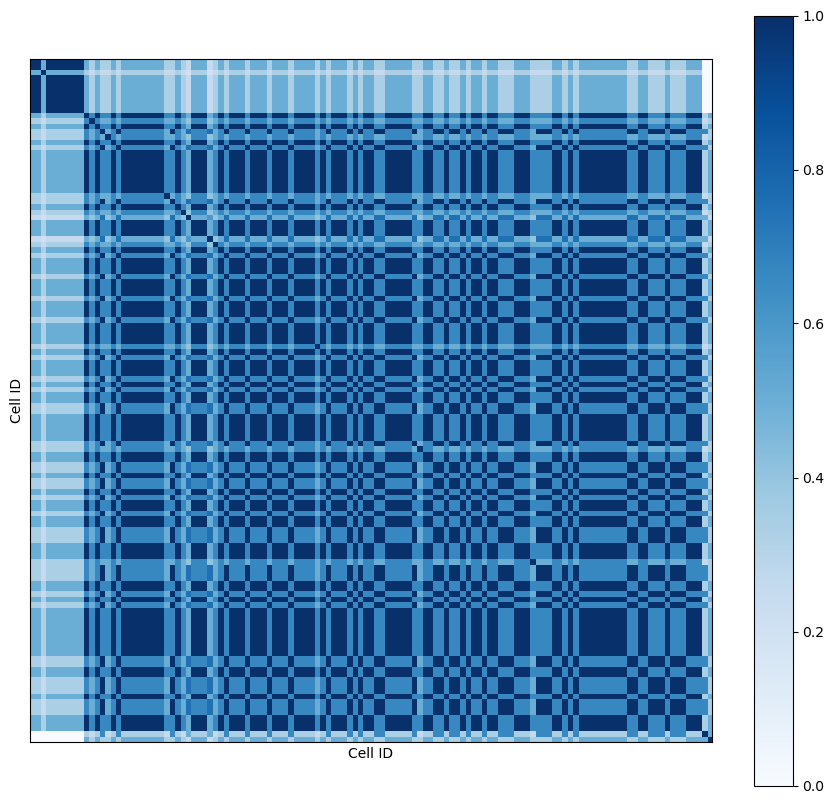

In [9]:
plot_jaccard_matrix(jaccard_similarity_matrix(selected_umi_df))

In [10]:
(selected_umi_df > 0).sum(axis=1)

Unnamed: 0
-----------------ACCGCAACCACAC      1
--------------CTCACCGCAACCACAC      1
------GTGGGTTGCAAGGGATGATGTACC      1
----CTAGAACGTGGGTTGCAAGGGAGTAC      1
AGACTTTCACTCGTAAAGATGCCATCCGTT      1
CTAGAACGTGGGTCTCTCTGGTTAGACCAG      1
CTAGAACGTGGGTTGCAAGGGATGATGTAC    125
CTTGGCTTTTTGGTGGGTTGGTGACAACGA      1
GAGTGAGTTAACAACTCACAGCAAAAACAC      1
GAGTGAGTTGATAACTCACCGCAACCACAC     38
GCTTGCTAGCGTTTCCGAATGTTCCAAATC      1
GTATCAACGCAGAGTACATGGGGTCGCGTC      1
TAGCGTATATTCTTCCGGACAGTGTCTGCT      1
TCTTTCAATCGGCAGACAGACCGTCGCGTC    117
dtype: int64

Let's do similar analysis for the different datsets, but comparing results across Thresholds.

## per Dataset

Let's compare the histograms resulting of the different thresholds.

20240214_T1_1001


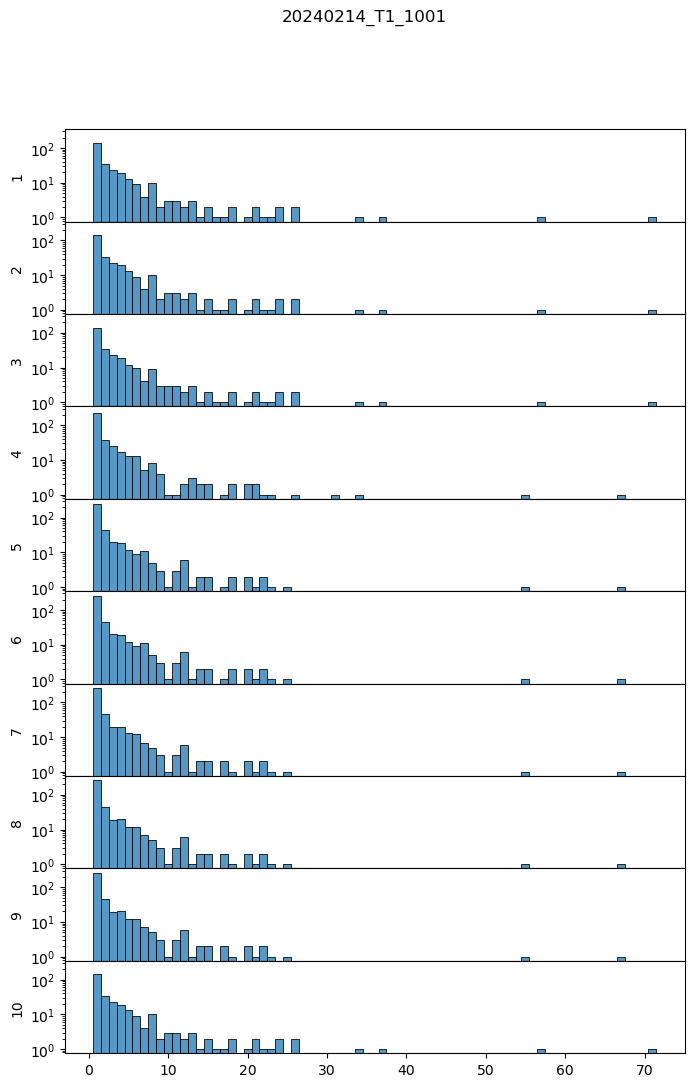

20240214_T2_1001


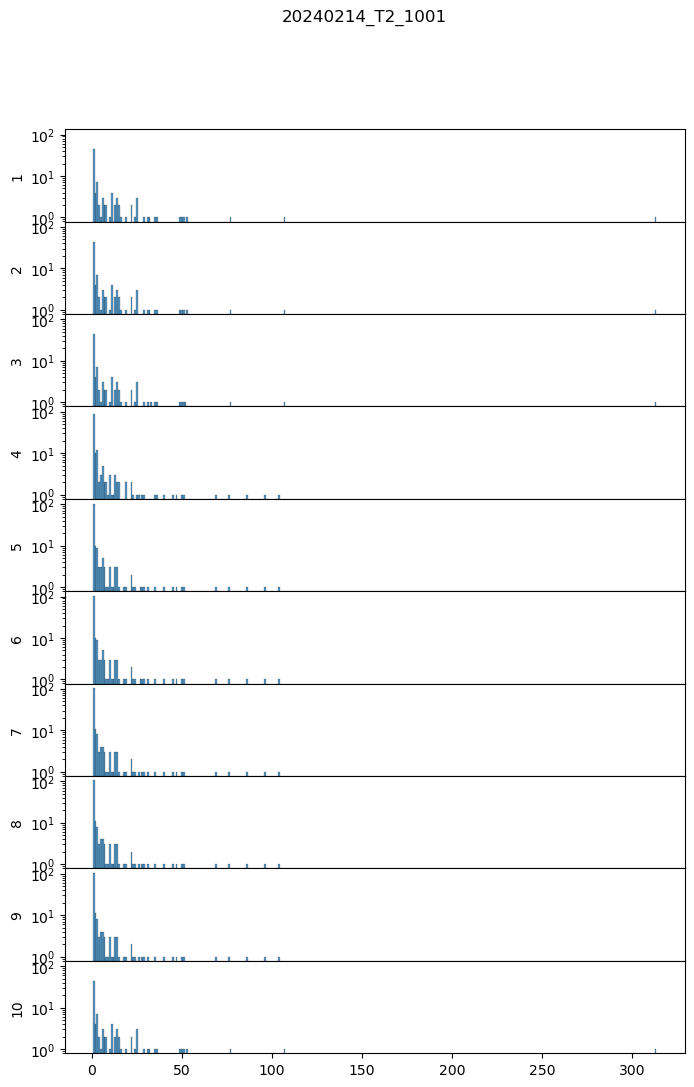

20240214_T2_1002


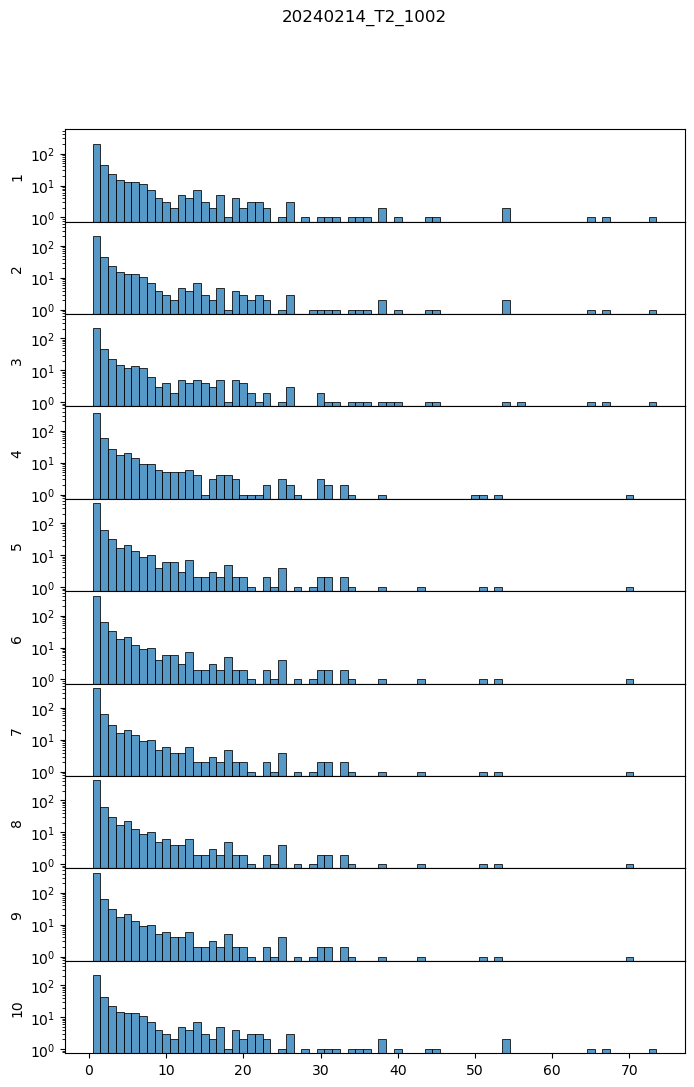

20240214_T2_1003


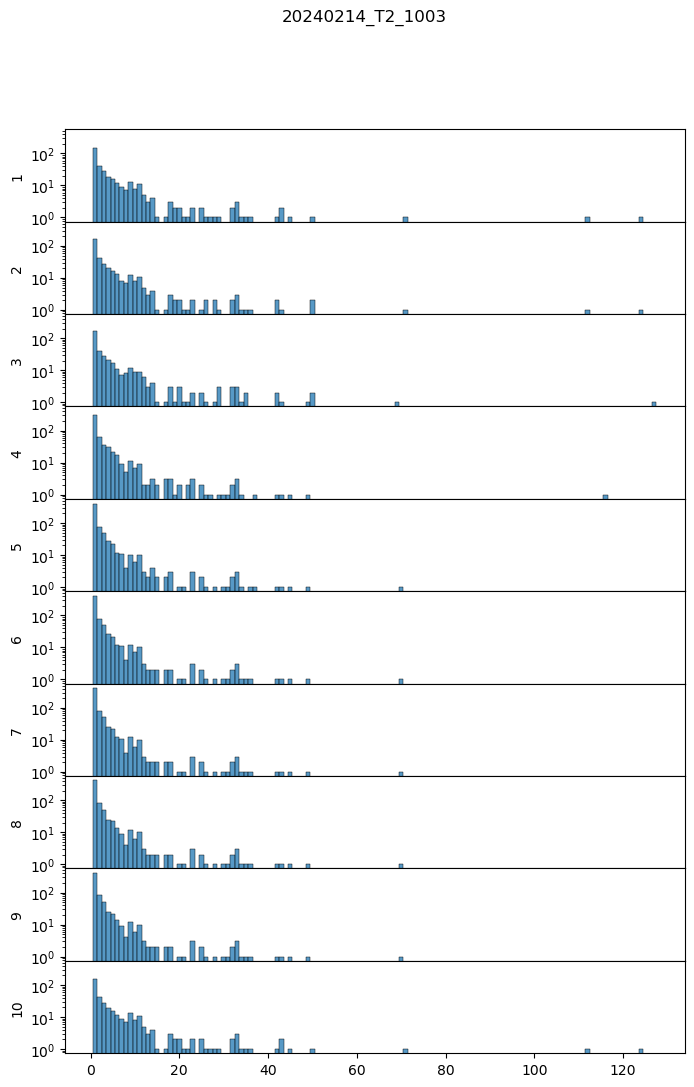

20240214_T2_1004


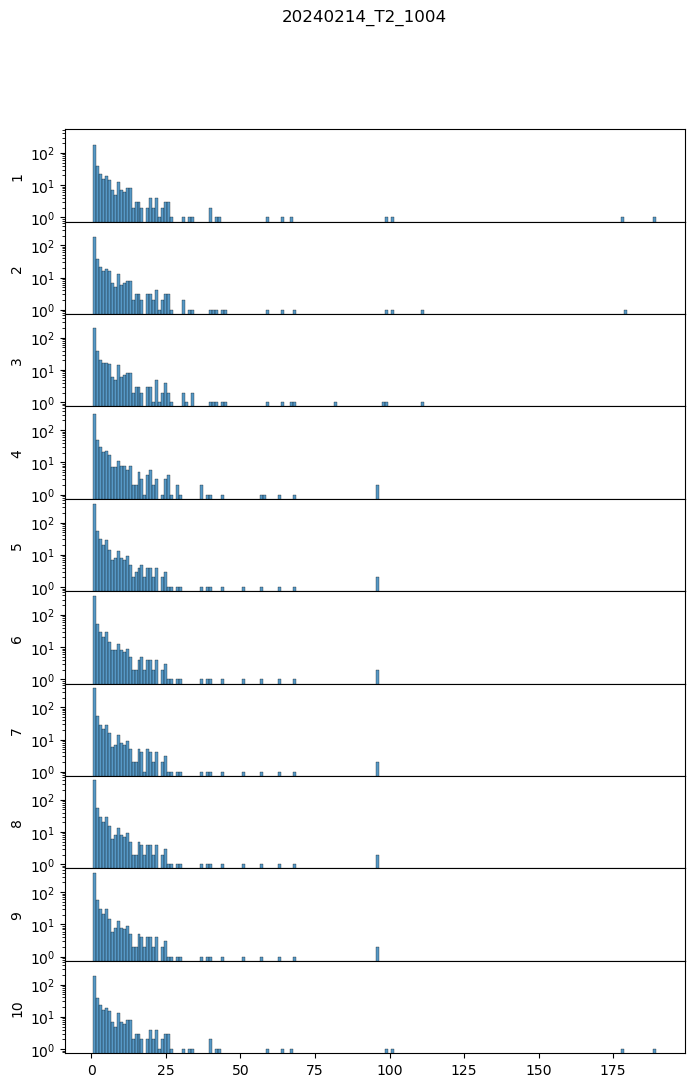

In [11]:
for this_dataset in datasets:
    print(this_dataset)
    fig, axs = plt.subplots(10, 1, sharex=True, sharey=True, figsize=(8, 12))
    for n, threshold in enumerate(jaccards.keys()):
        this_data_dir = DATA_DIR / "_".join([this_dataset, threshold, "output"])
        clones_df = read_clone_ids(this_data_dir)
        plot_discrete_histogram(clones_df.clone_nr.value_counts(), axes=axs[n], ylabel=threshold)
    plt.suptitle(this_dataset)
    plt.subplots_adjust(hspace=0)
    plt.show()
    

20240214_T1_1001
1


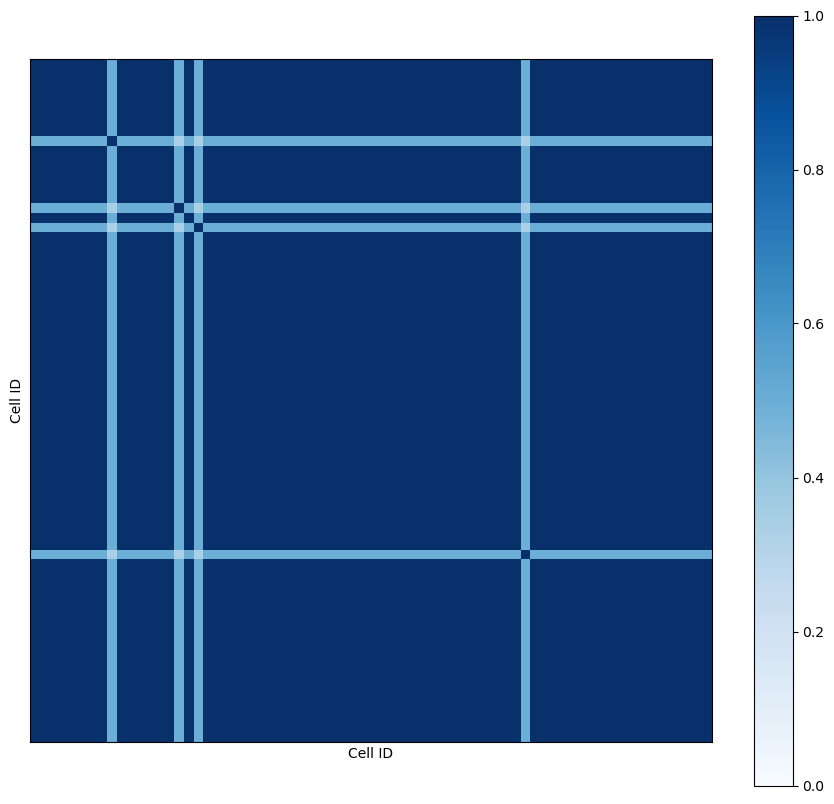

Unnamed: 0
-------------------CATTGCCAATG     1
AATGTTGTAGGCTCATACTTGGCGGGGGAA     1
ATGTTGTAGGCTCATACTTGGCGGGGGGAA    71
CGCAGAGTACATGGGACTTGGCGGGGGGAA     1
TGCACGGTTTCTAAAGGTGTGTTTCCTCGG     1
dtype: int64
2


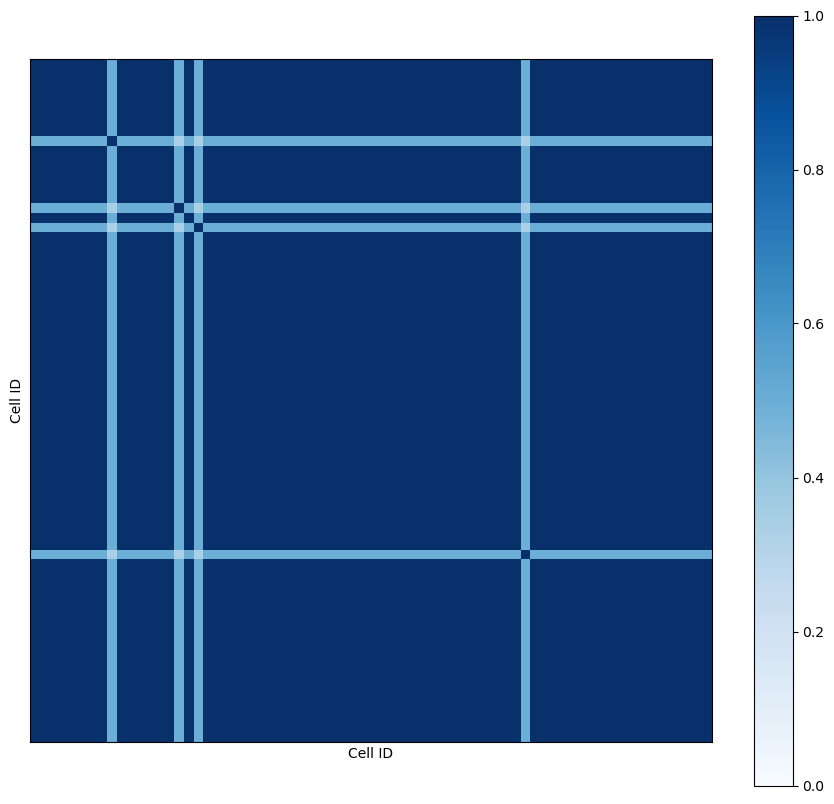

Unnamed: 0
-------------------CATTGCCAATG     1
AATGTTGTAGGCTCATACTTGGCGGGGGAA     1
ATGTTGTAGGCTCATACTTGGCGGGGGGAA    71
CGCAGAGTACATGGGACTTGGCGGGGGGAA     1
TGCACGGTTTCTAAAGGTGTGTTTCCTCGG     1
dtype: int64
3


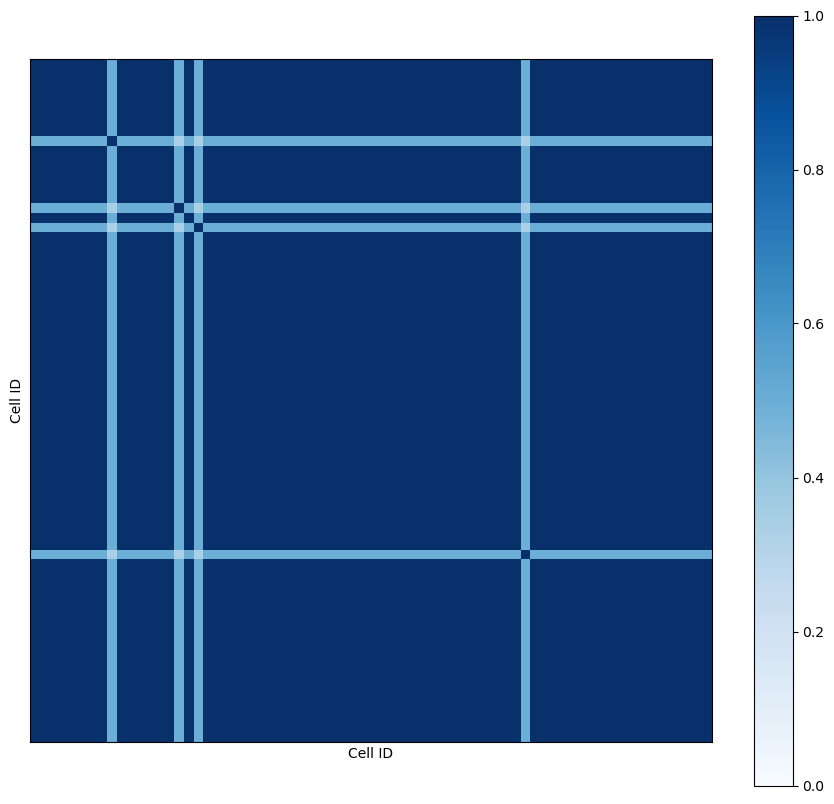

Unnamed: 0
-------------------CATTGCCAATG     1
AATGTTGTAGGCTCATACTTGGCGGGGGAA     1
ATGTTGTAGGCTCATACTTGGCGGGGGGAA    71
CGCAGAGTACATGGGACTTGGCGGGGGGAA     1
TGCACGGTTTCTAAAGGTGTGTTTCCTCGG     1
dtype: int64
4


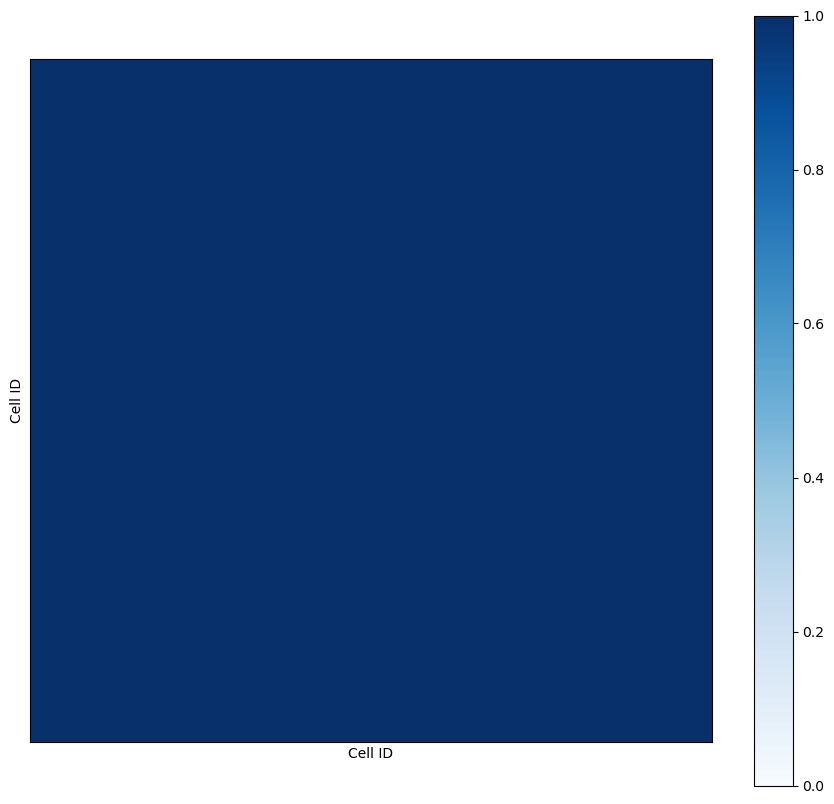

Unnamed: 0
ATGTTGTAGGCTCATACTTGGCGGGGGGAA    67
dtype: int64
5


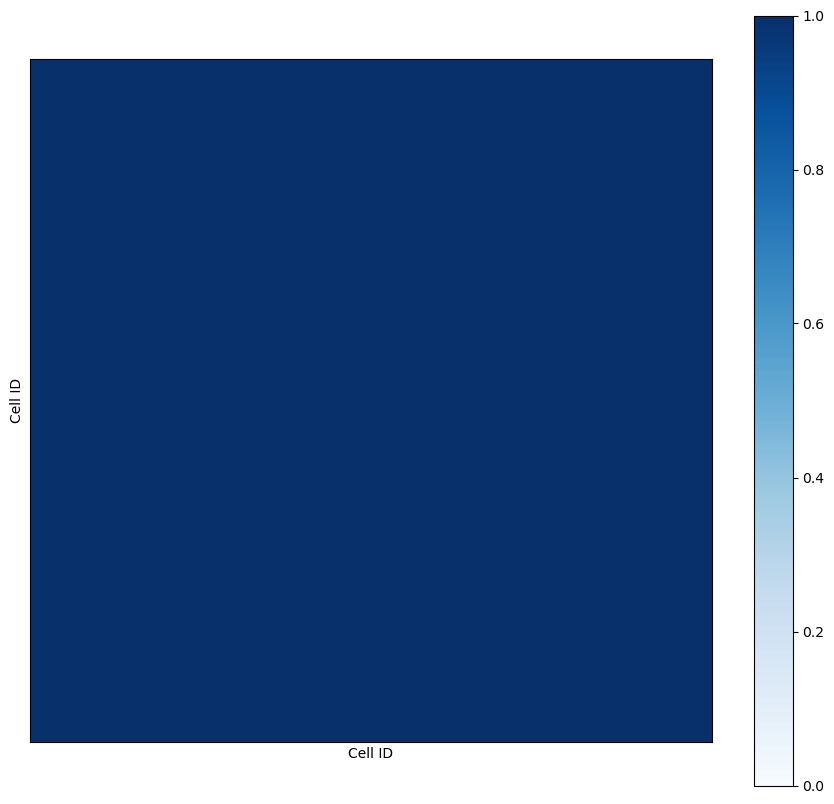

Unnamed: 0
ATGTTGTAGGCTCATACTTGGCGGGGGGAA    67
dtype: int64
6


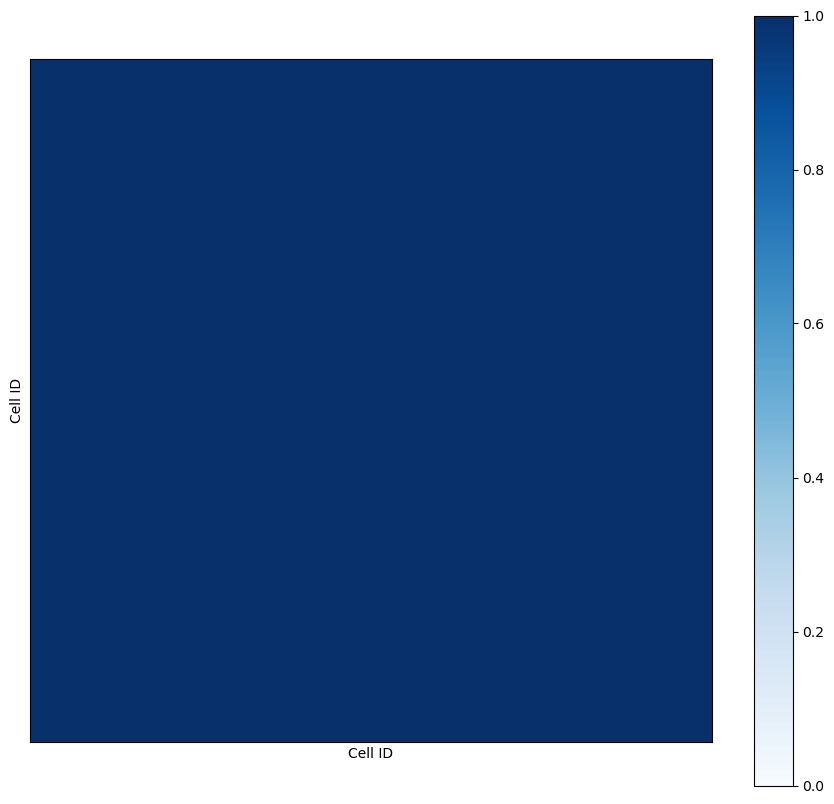

Unnamed: 0
ATGTTGTAGGCTCATACTTGGCGGGGGGAA    67
dtype: int64
7


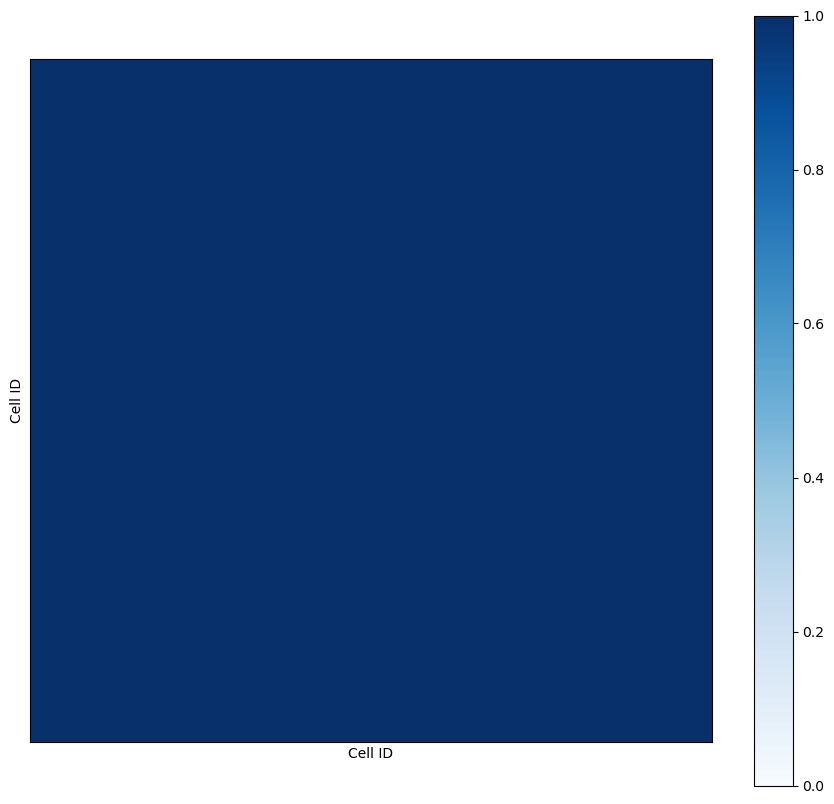

Unnamed: 0
ATGTTGTAGGCTCATACTTGGCGGGGGGAA    67
dtype: int64
8


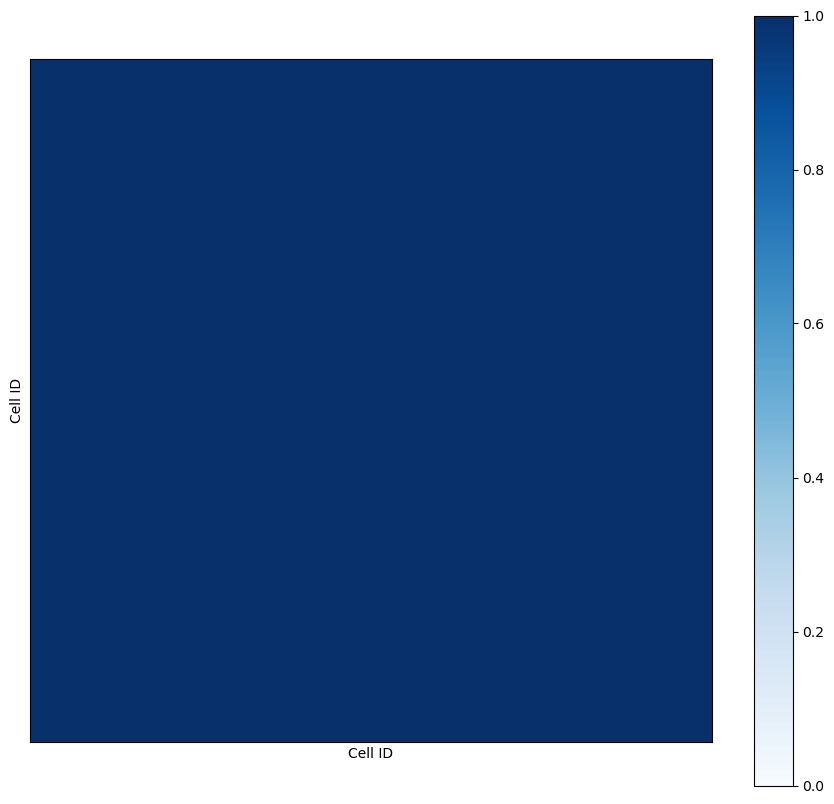

Unnamed: 0
ATGTTGTAGGCTCATACTTGGCGGGGGGAA    67
dtype: int64
9


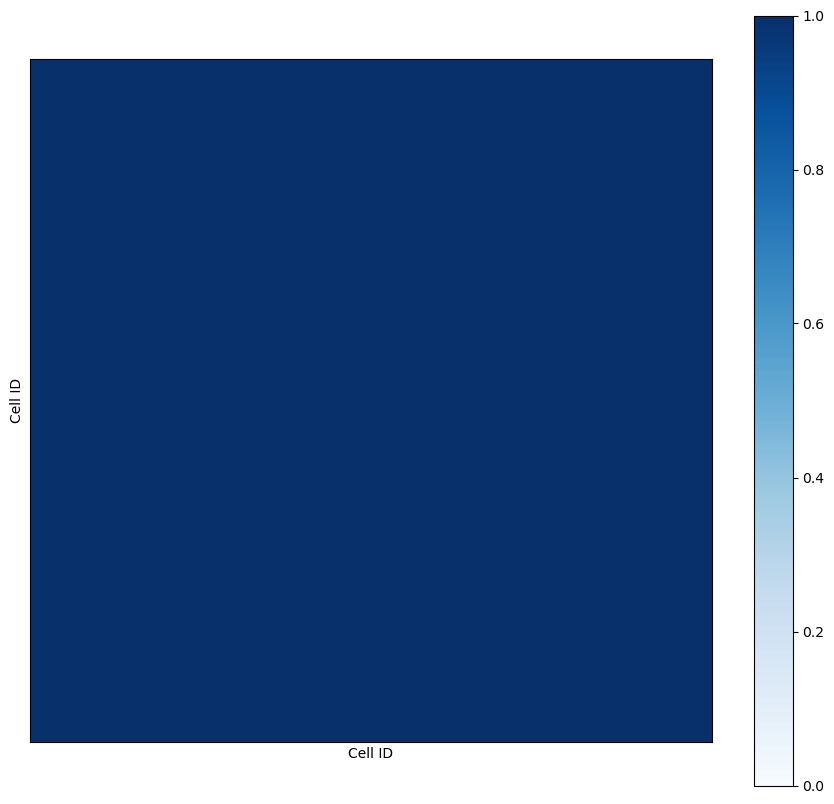

Unnamed: 0
ATGTTGTAGGCTCATACTTGGCGGGGGGAA    67
dtype: int64
10


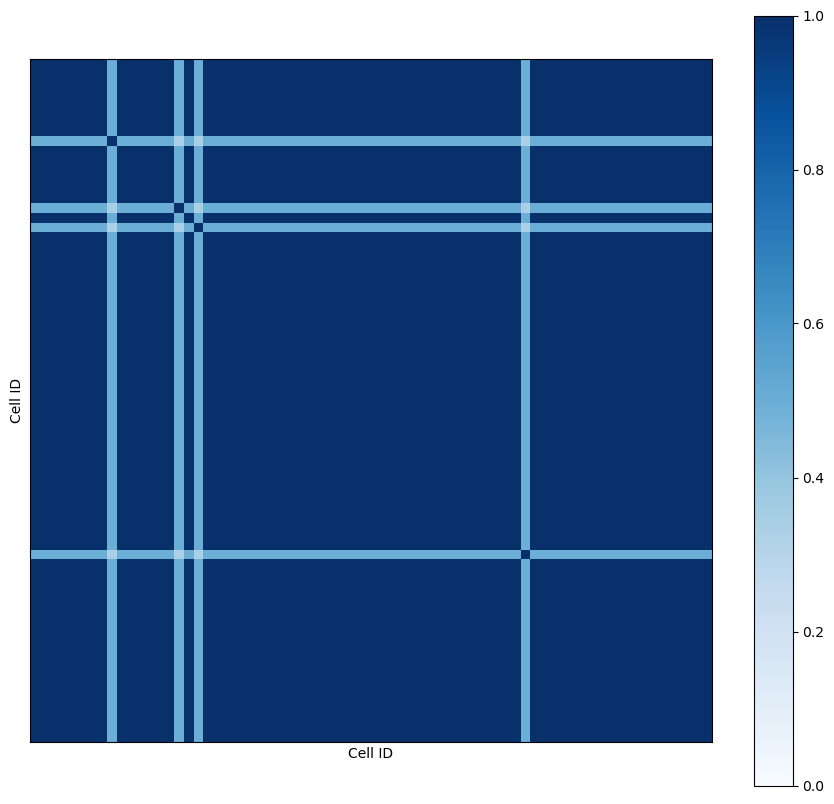

Unnamed: 0
-------------------CATTGCCAATG     1
AATGTTGTAGGCTCATACTTGGCGGGGGAA     1
ATGTTGTAGGCTCATACTTGGCGGGGGGAA    71
CGCAGAGTACATGGGACTTGGCGGGGGGAA     1
TGCACGGTTTCTAAAGGTGTGTTTCCTCGG     1
dtype: int64
20240214_T2_1001
1


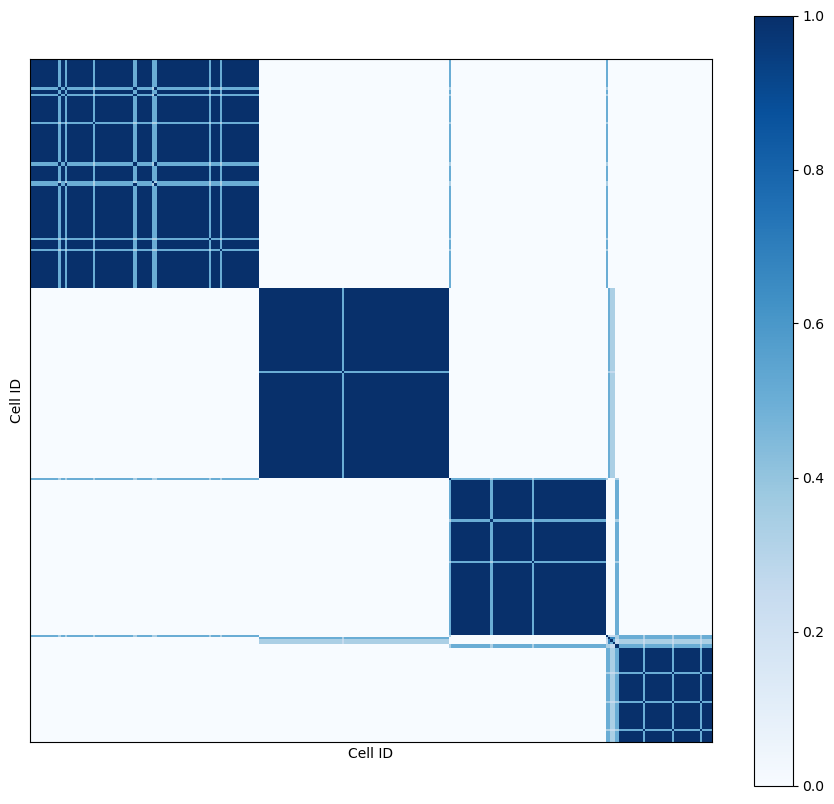

Unnamed: 0
----------------------TACATCCT      1
---------------CTTAGTAAGGAGCTA      1
-------AGCAGTGGTATCAACGCAGAGTA      1
AATTCCTAAGCCAAAGGCCA----------      1
AATTCCTTAGGCTAATGGCTAAGATATGGA     74
AATTCGTGTCACGTTATTTTATTTTGTGCA      3
ATCCTTCTTCATTGGATCATACGTGGCATC     90
CCTCTGTTATGACCGCTTATGCTACATCCT      1
GGCAAGCCTATAGTTGGTCCGATATGGTAC     49
GTATCAACGCAGAGTACATGGGGTGGCATC      1
TATCAACGCAGAGTACATGGGAGATATGGA      1
TCCTTCCGCCAACCCCTTTTTTCCTTTAGT      1
TCTTTCTGCTAGCCCTTTTTTTCTTTTAGT      5
TGGTATCAACGCAGAGTACATAGGGGCATC      1
TTCTTTCTGCTAGCCCTTTTTTCTTTTAGT    107
dtype: int64
2


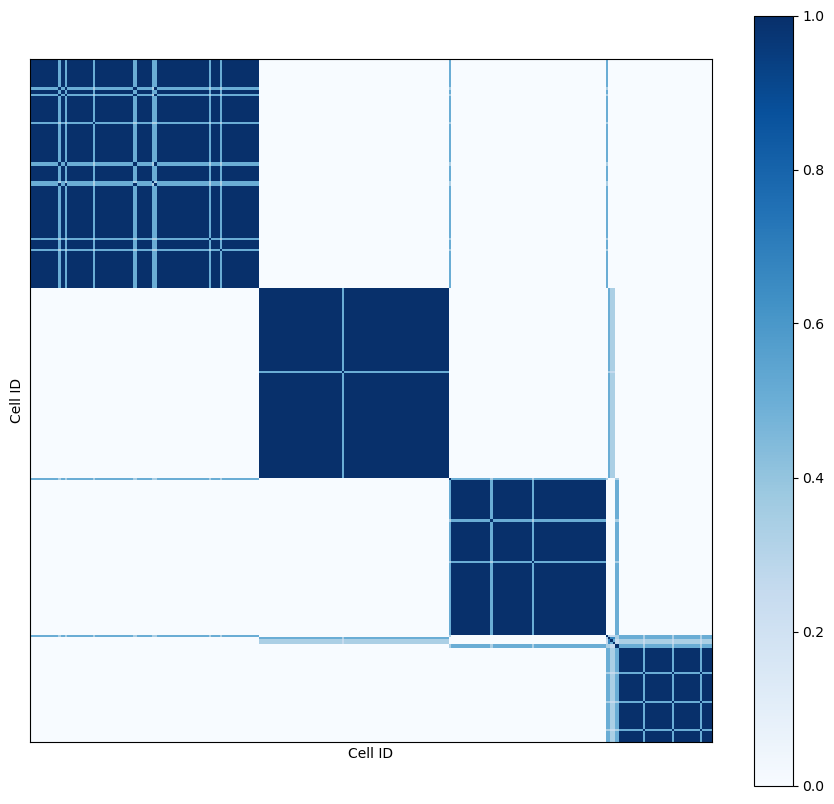

Unnamed: 0
----------------------TACATCCT      1
---------------CTTAGTAAGGAGCTA      1
-------AGCAGTGGTATCAACGCAGAGTA      1
AATTCCTAAGCCAAAGGCCA----------      1
AATTCCTTAGGCTAATGGCTAAGATATGGA     74
AATTCGTGTCACGTTATTTTATTTTGTGCA      3
ATCCTTCTTCATTGGATCATACGTGGCATC     90
CCTCTGTTATGACCGCTTATGCTACATCCT      1
GGCAAGCCTATAGTTGGTCCGATATGGTAC     49
GTATCAACGCAGAGTACATGGGGTGGCATC      1
TATCAACGCAGAGTACATGGGAGATATGGA      1
TCCTTCCGCCAACCCCTTTTTTCCTTTAGT      1
TCTTTCTGCTAGCCCTTTTTTTCTTTTAGT      5
TGGTATCAACGCAGAGTACATAGGGGCATC      1
TTCTTTCTGCTAGCCCTTTTTTCTTTTAGT    107
dtype: int64
3


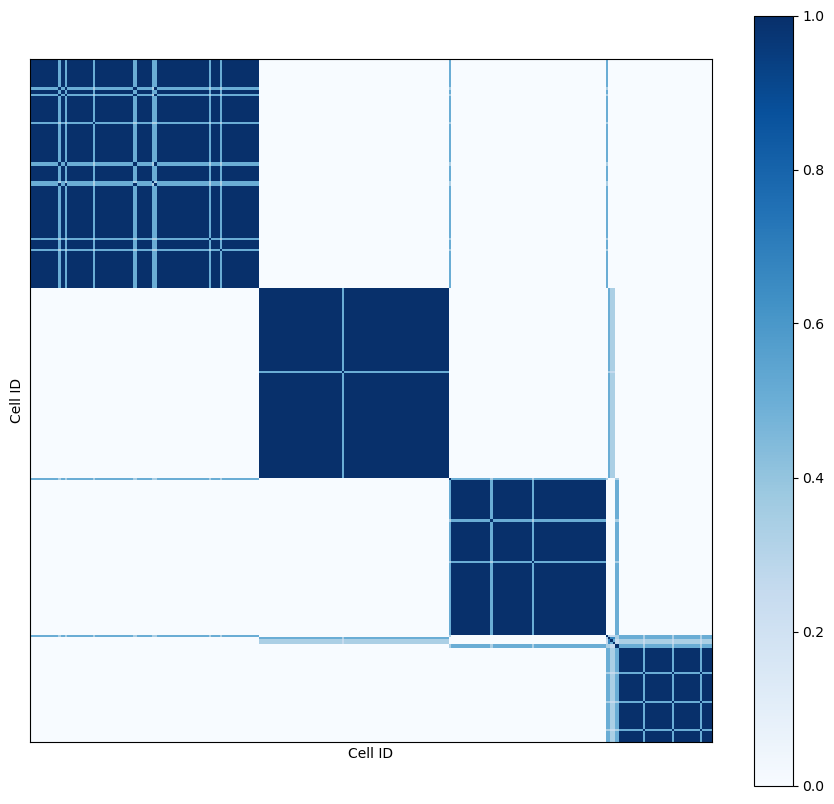

Unnamed: 0
----------------------TACATCCT      1
---------------CTTAGTAAGGAGCTA      1
-------AGCAGTGGTATCAACGCAGAGTA      1
AATTCCTAAGCCAAAGGCCA----------      1
AATTCCTTAGGCTAATGGCTAAGATATGGA     74
AATTCGTGTCACGTTATTTTATTTTGTGCA      3
ATCCTTCTTCATTGGATCATACGTGGCATC     90
CCTCTGTTATGACCGCTTATGCTACATCCT      1
GGCAAGCCTATAGTTGGTCCGATATGGTAC     49
GTATCAACGCAGAGTACATGGGGTGGCATC      1
TATCAACGCAGAGTACATGGGAGATATGGA      1
TCCTTCCGCCAACCCCTTTTTTCCTTTAGT      1
TCTTTCTGCTAGCCCTTTTTTTCTTTTAGT      5
TGGTATCAACGCAGAGTACATAGGGGCATC      1
TTCTTTCTGCTAGCCCTTTTTTCTTTTAGT    107
dtype: int64
4


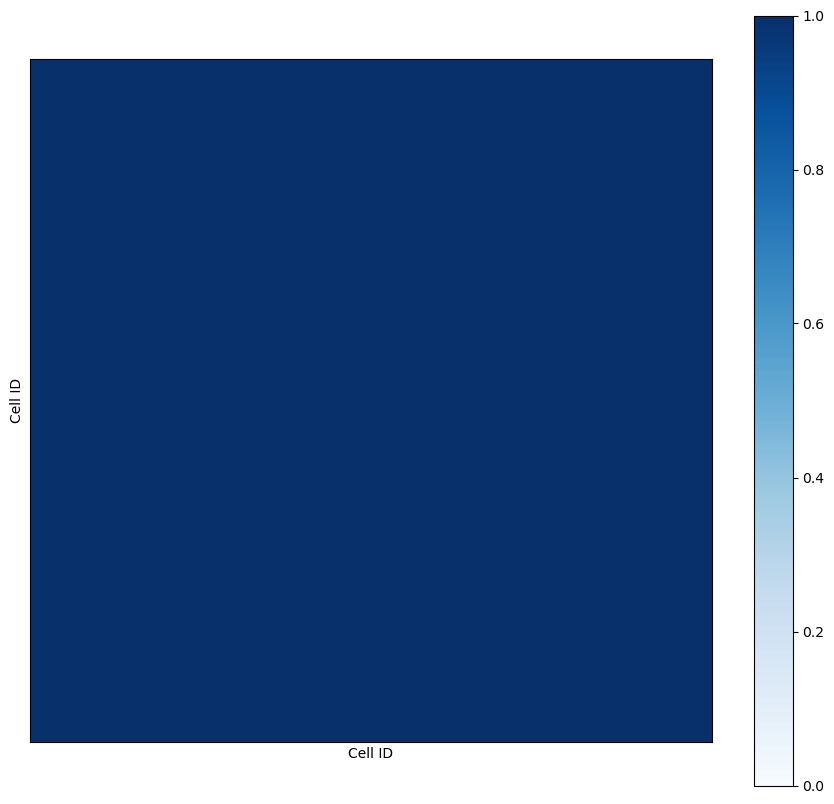

Unnamed: 0
CCTGTCCTCTCACGTTTCCACGTTGCCGGC    104
dtype: int64
5


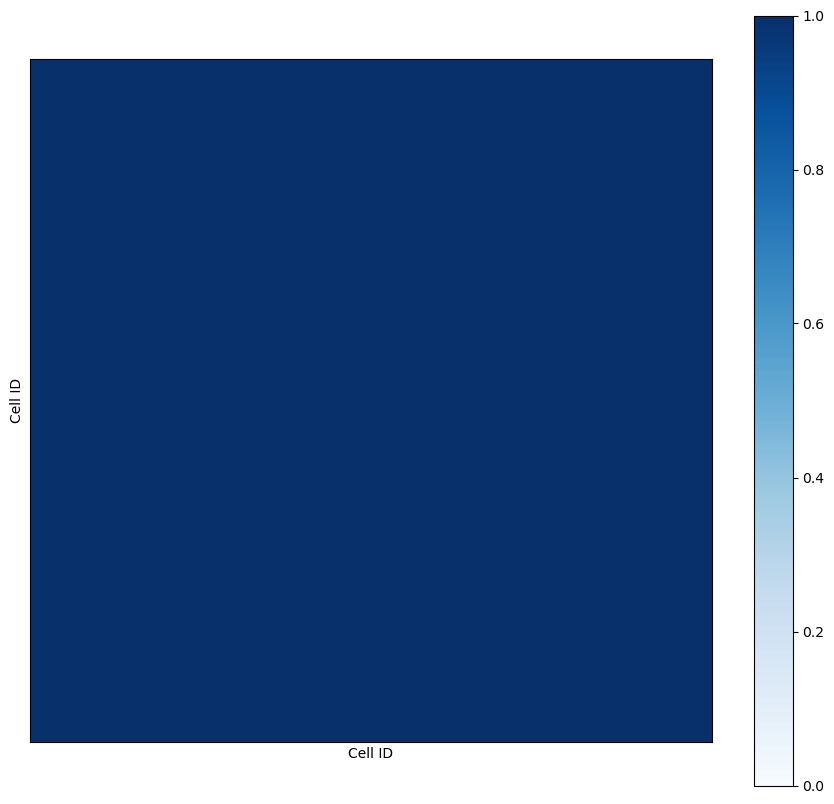

Unnamed: 0
CCTGTCCTCTCACGTTTCCACGTTGCCGGC    104
dtype: int64
6


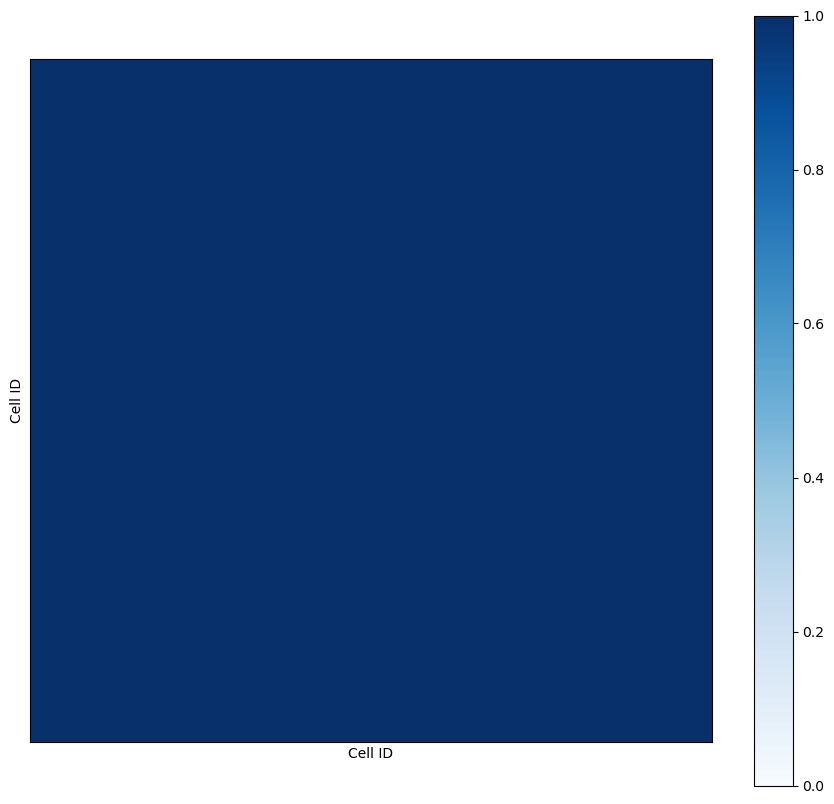

Unnamed: 0
CCTGTCCTCTCACGTTTCCACGTTGCCGGC    104
dtype: int64
7


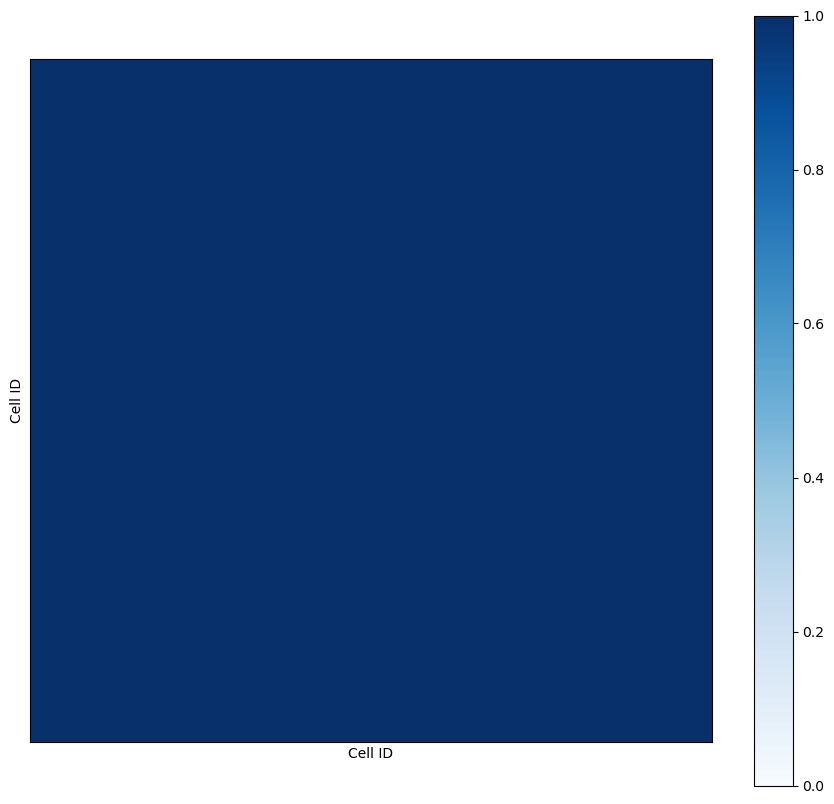

Unnamed: 0
CCTGTCCTCTCACGTTTCCACGTTGCCGGC    104
dtype: int64
8


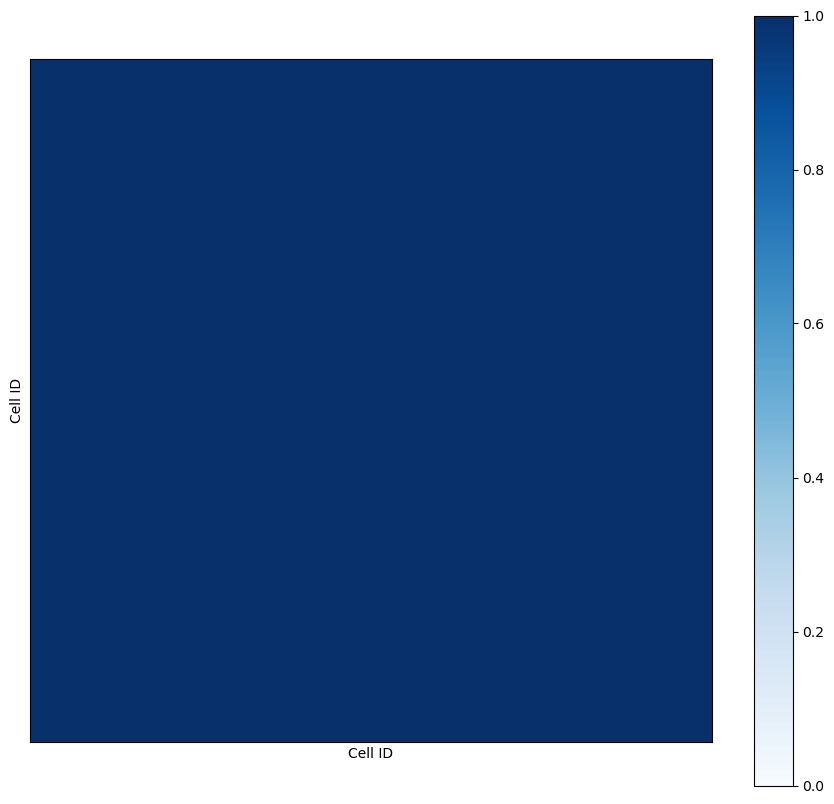

Unnamed: 0
CCTGTCCTCTCACGTTTCCACGTTGCCGGC    104
dtype: int64
9


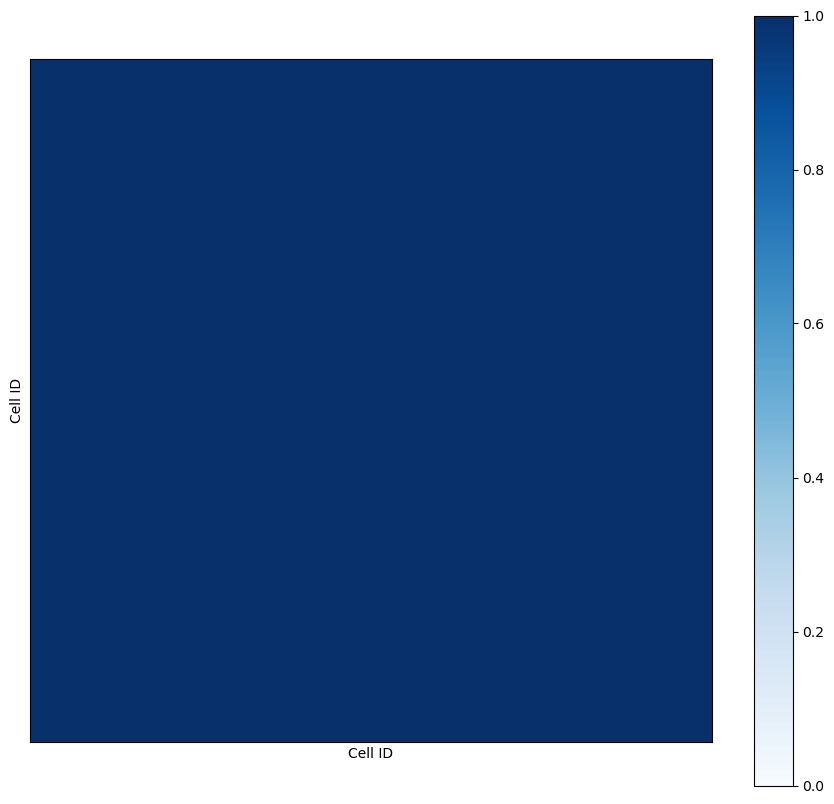

Unnamed: 0
CCTGTCCTCTCACGTTTCCACGTTGCCGGC    104
dtype: int64
10


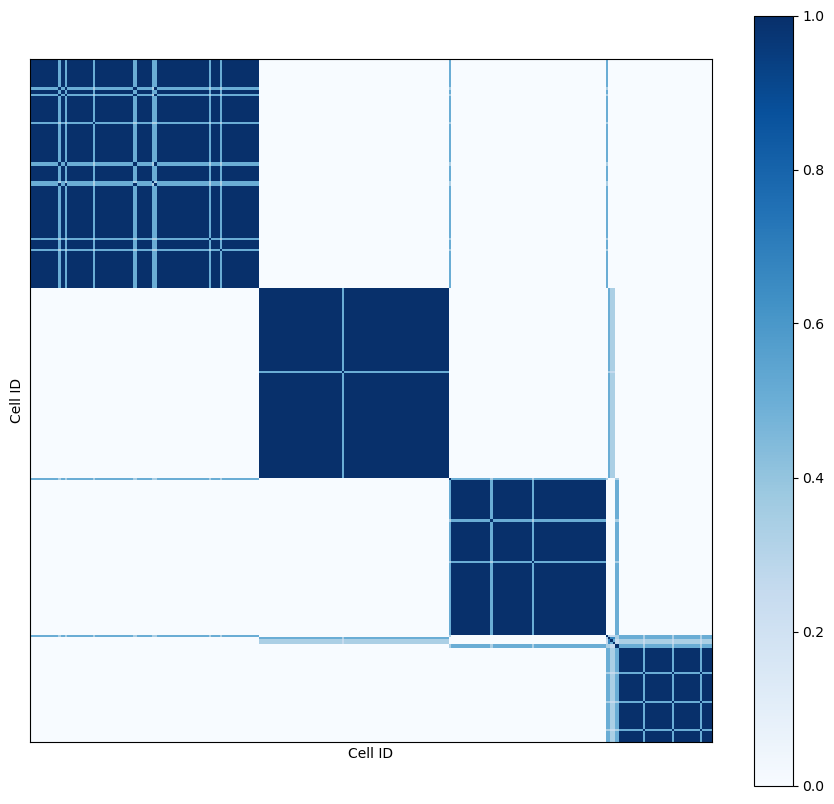

Unnamed: 0
----------------------TACATCCT      1
---------------CTTAGTAAGGAGCTA      1
-------AGCAGTGGTATCAACGCAGAGTA      1
AATTCCTAAGCCAAAGGCCA----------      1
AATTCCTTAGGCTAATGGCTAAGATATGGA     74
AATTCGTGTCACGTTATTTTATTTTGTGCA      3
ATCCTTCTTCATTGGATCATACGTGGCATC     90
CCTCTGTTATGACCGCTTATGCTACATCCT      1
GGCAAGCCTATAGTTGGTCCGATATGGTAC     49
GTATCAACGCAGAGTACATGGGGTGGCATC      1
TATCAACGCAGAGTACATGGGAGATATGGA      1
TCCTTCCGCCAACCCCTTTTTTCCTTTAGT      1
TCTTTCTGCTAGCCCTTTTTTTCTTTTAGT      5
TGGTATCAACGCAGAGTACATAGGGGCATC      1
TTCTTTCTGCTAGCCCTTTTTTCTTTTAGT    107
dtype: int64
20240214_T2_1002
1


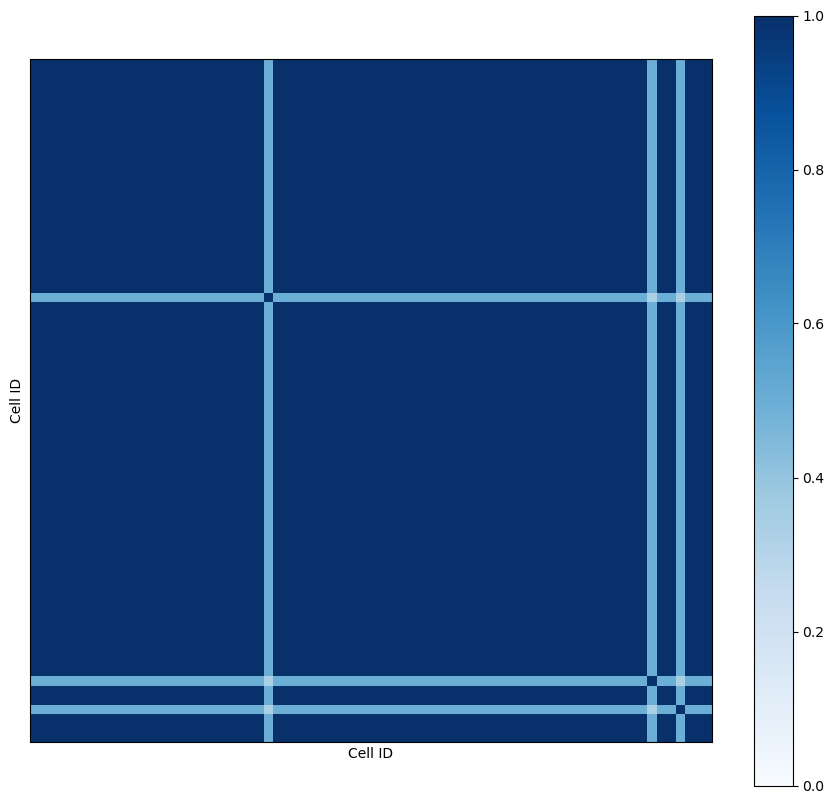

Unnamed: 0
---------------------AAGAAATTT     1
----CTTGGGAGGAACGGCGTGAGGGGACC     1
---CAGAGTACATGGGCTATGGCTCTTGGC     1
GAGGTGTCGTTAGTAACTATGGCTCTTGGC    73
dtype: int64
2


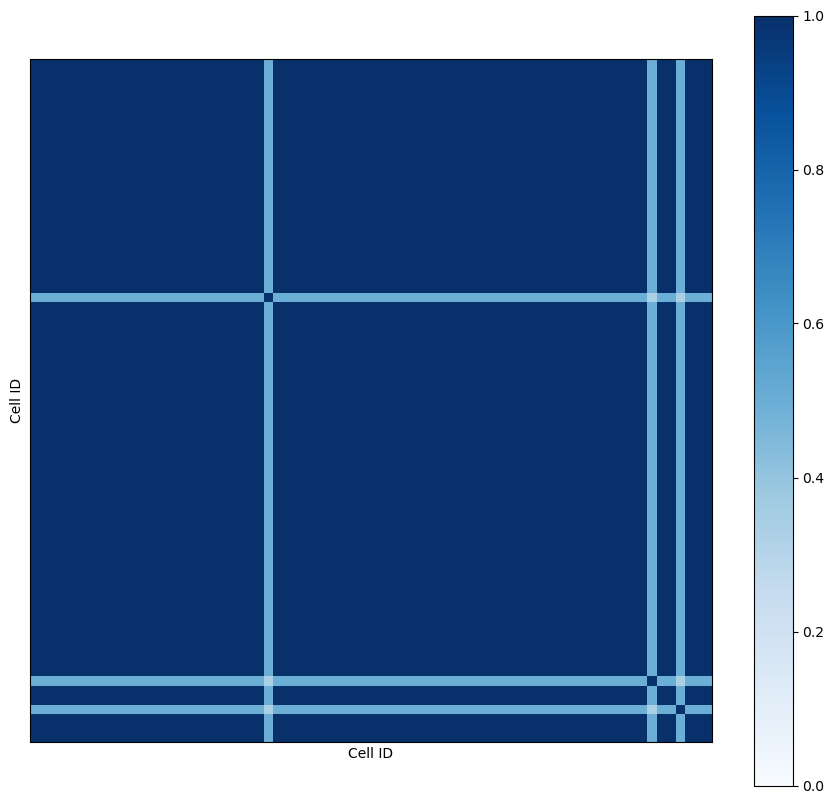

Unnamed: 0
---------------------AAGAAATTT     1
----CTTGGGAGGAACGGCGTGAGGGGACC     1
---CAGAGTACATGGGCTATGGCTCTTGGC     1
GAGGTGTCGTTAGTAACTATGGCTCTTGGC    73
dtype: int64
3


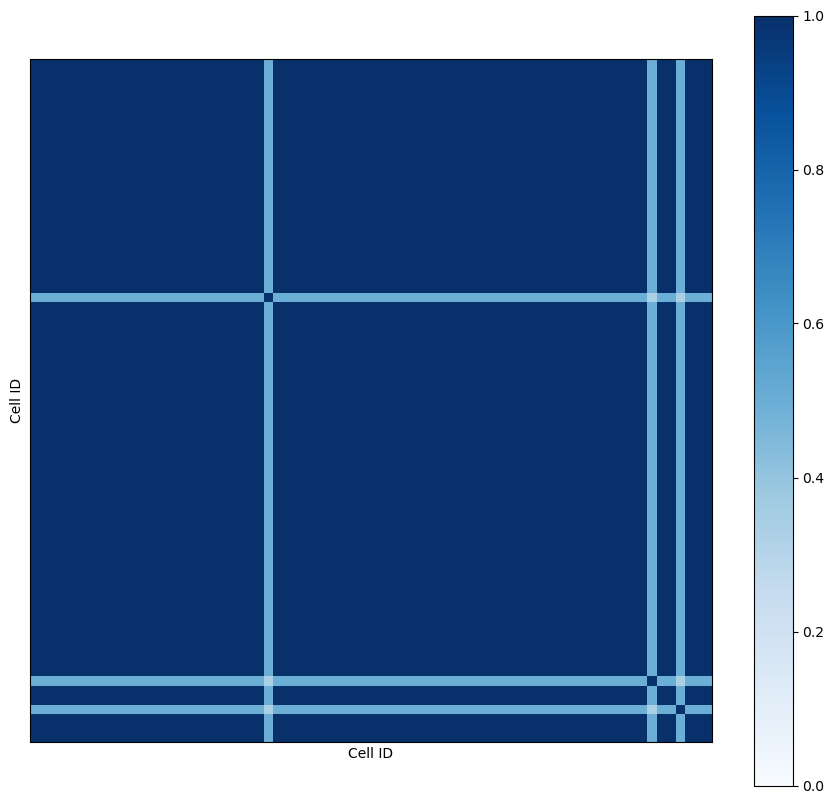

Unnamed: 0
---------------------AAGAAATTT     1
----CTTGGGAGGAACGGCGTGAGGGGACC     1
---CAGAGTACATGGGCTATGGCTCTTGGC     1
GAGGTGTCGTTAGTAACTATGGCTCTTGGC    73
dtype: int64
4


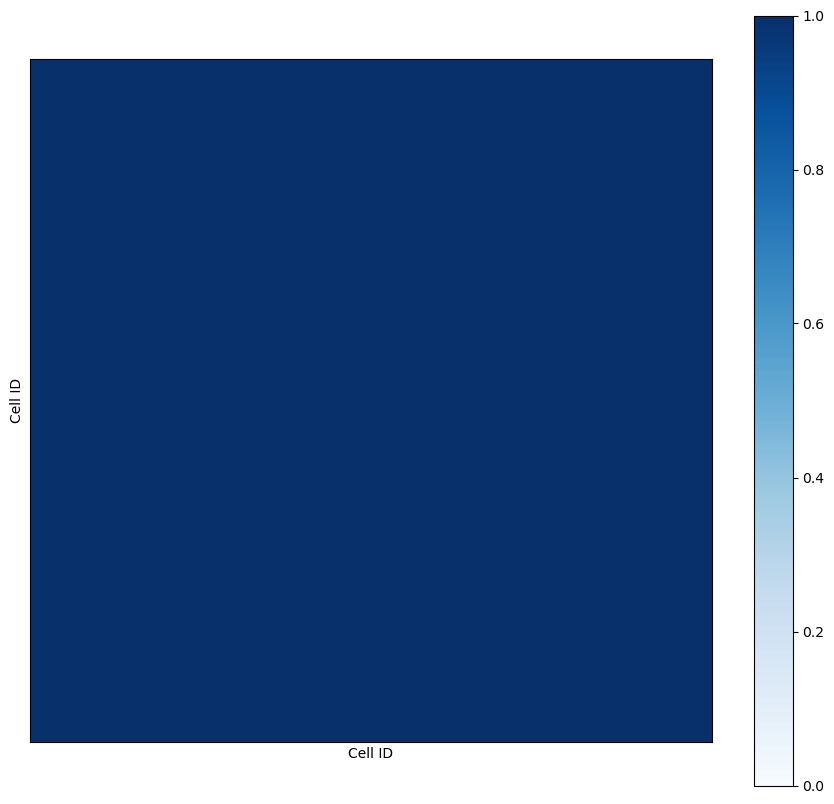

Unnamed: 0
GAGGTGTCGTTAGTAACTATGGCTCTTGGC    70
dtype: int64
5


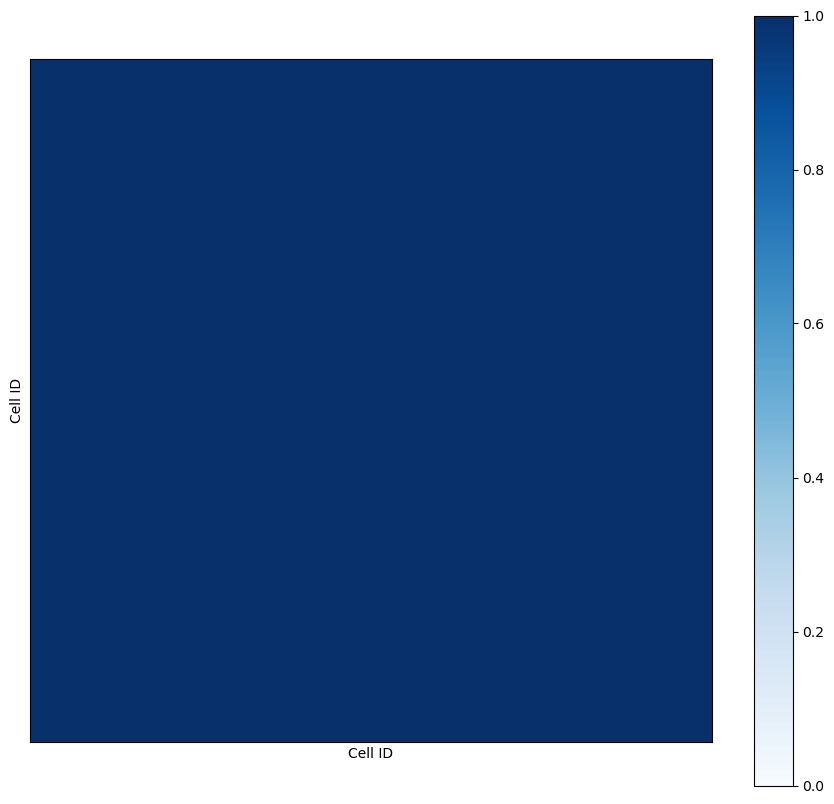

Unnamed: 0
GAGGTGTCGTTAGTAACTATGGCTCTTGGC    70
dtype: int64
6


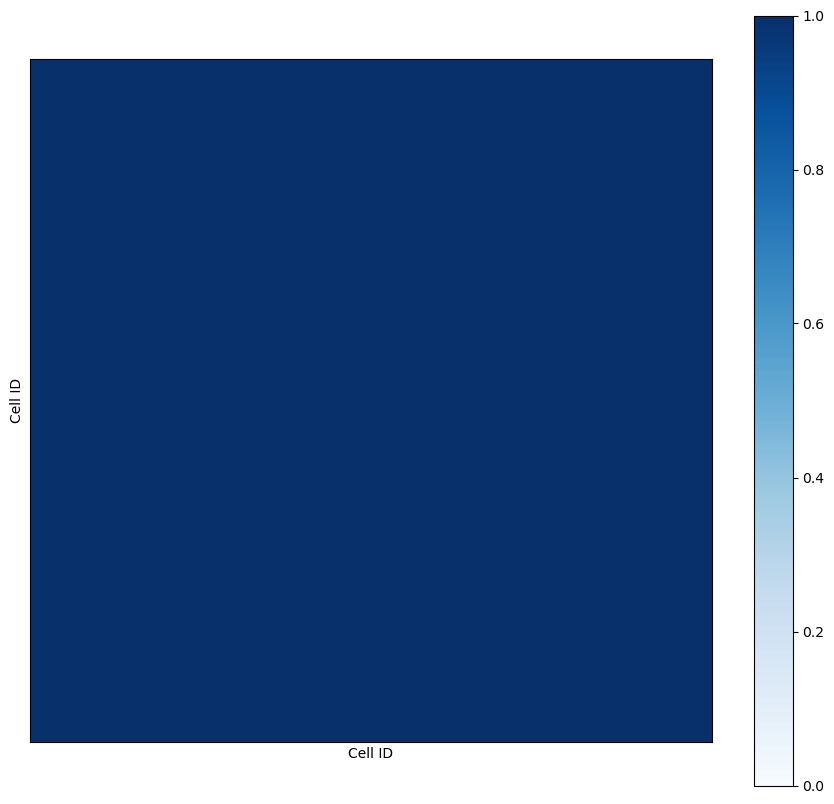

Unnamed: 0
GAGGTGTCGTTAGTAACTATGGCTCTTGGC    70
dtype: int64
7


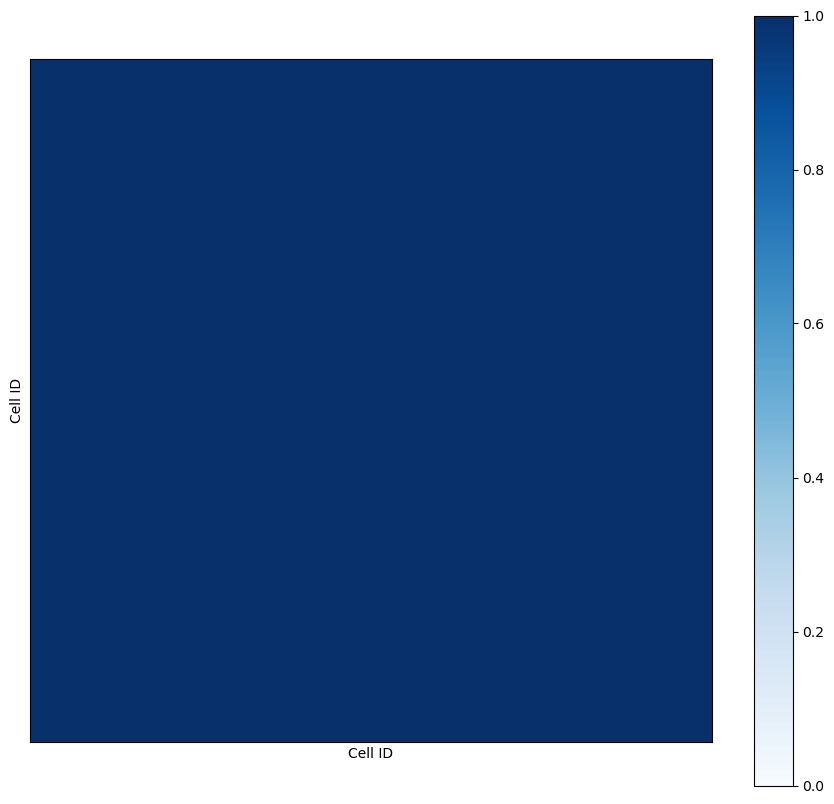

Unnamed: 0
GAGGTGTCGTTAGTAACTATGGCTCTTGGC    70
dtype: int64
8


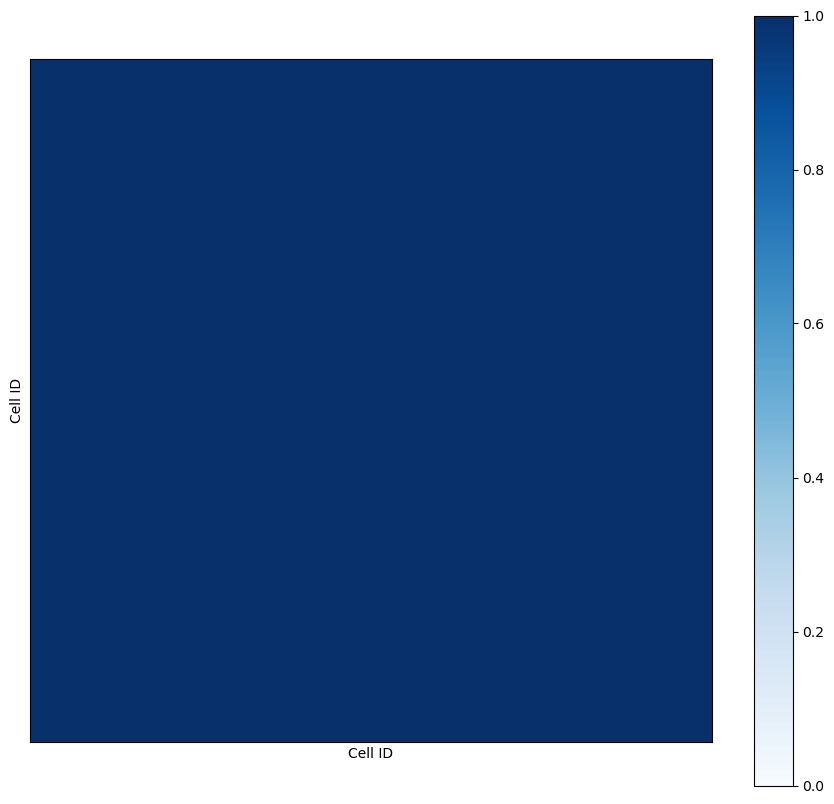

Unnamed: 0
GAGGTGTCGTTAGTAACTATGGCTCTTGGC    70
dtype: int64
9


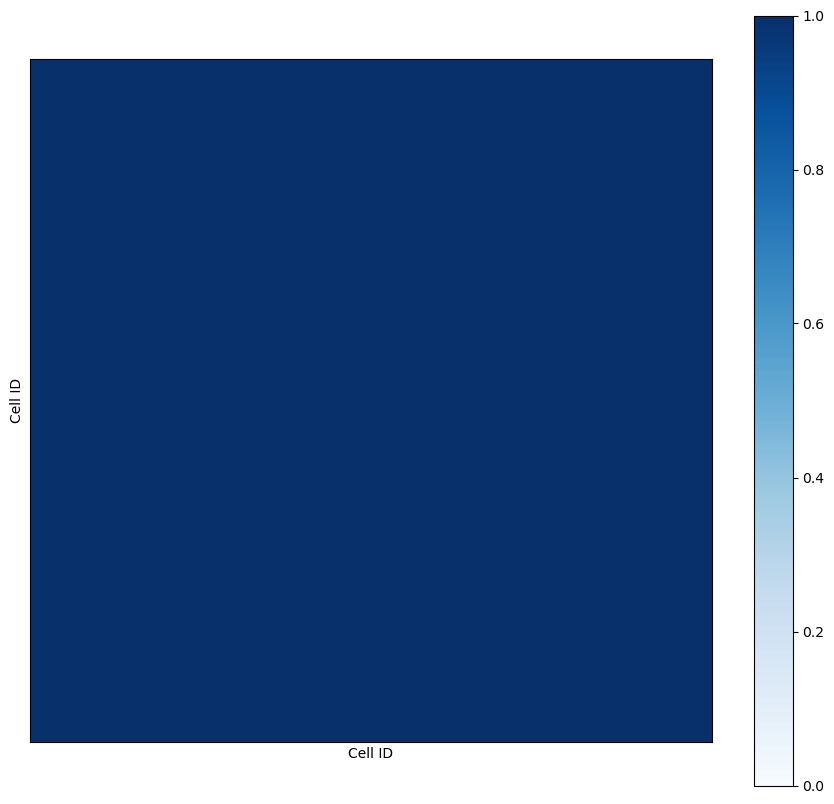

Unnamed: 0
GAGGTGTCGTTAGTAACTATGGCTCTTGGC    70
dtype: int64
10


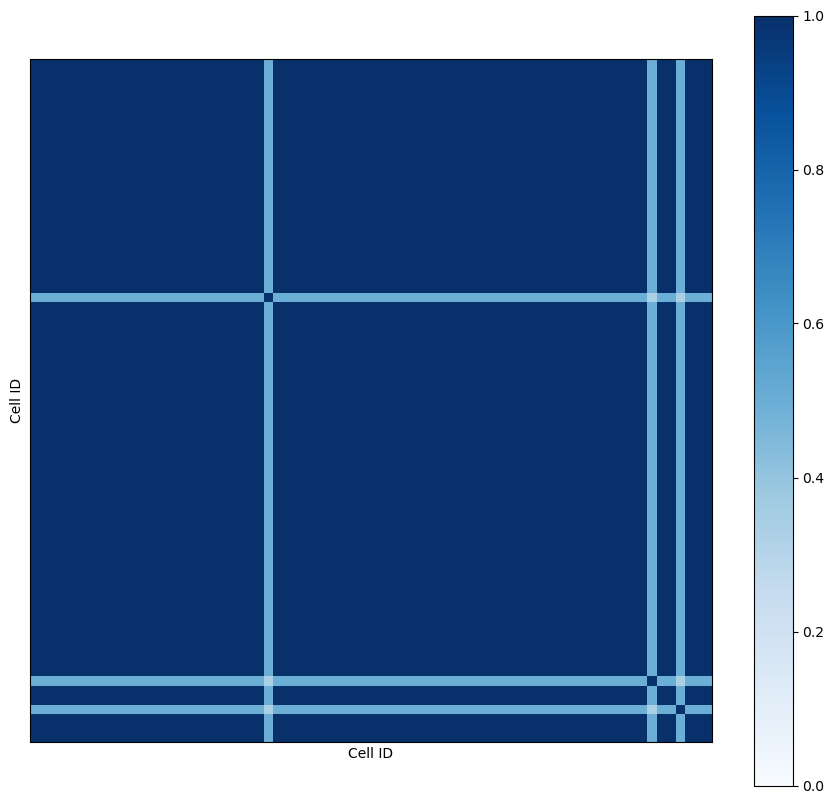

Unnamed: 0
---------------------AAGAAATTT     1
----CTTGGGAGGAACGGCGTGAGGGGACC     1
---CAGAGTACATGGGCTATGGCTCTTGGC     1
GAGGTGTCGTTAGTAACTATGGCTCTTGGC    73
dtype: int64
20240214_T2_1003
1


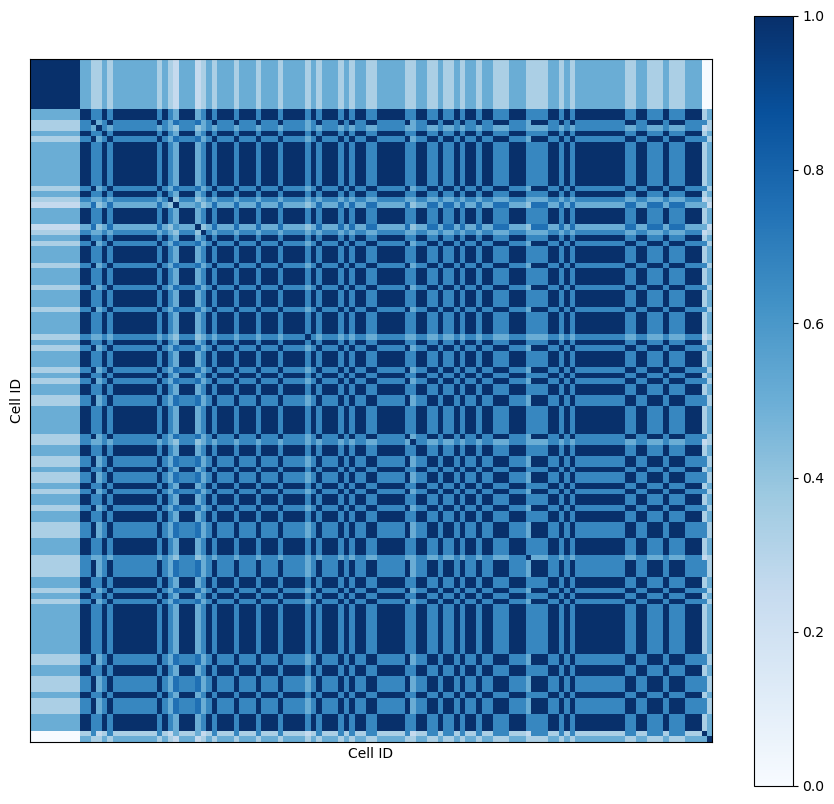

Unnamed: 0
-----------------ACCGCAACCACAC      1
--------------CTCACCGCAACCACAC      1
------GTGGGTTGCAAGGGATGATGTACC      1
----CTAGAACGTGGGTTGCAAGGGAGTAC      1
CTAGAACGTGGGTCTCTCTGGTTAGACCAG      1
CTAGAACGTGGGTTGCAAGGGATGATGTAC    122
GAGTGAGTTAACAACTCACAGCAAAAACAC      1
GAGTGAGTTGATAACTCACCGCAACCACAC     38
GTATCAACGCAGAGTACATGGGGTCGCGTC      1
TAGCGTATATTCTTCCGGACAGTGTCTGCT      1
TCTTTCAATCGGCAGACAGACCGTCGCGTC    115
dtype: int64
2


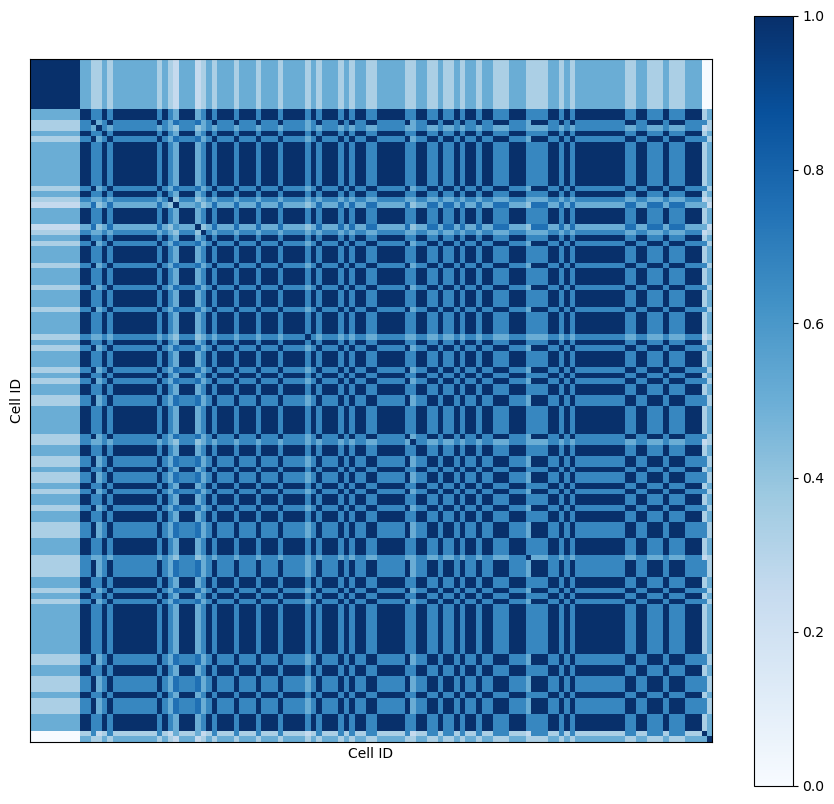

Unnamed: 0
-----------------ACCGCAACCACAC      1
--------------CTCACCGCAACCACAC      1
------GTGGGTTGCAAGGGATGATGTACC      1
----CTAGAACGTGGGTTGCAAGGGAGTAC      1
CTAGAACGTGGGTCTCTCTGGTTAGACCAG      1
CTAGAACGTGGGTTGCAAGGGATGATGTAC    122
GAGTGAGTTAACAACTCACAGCAAAAACAC      1
GAGTGAGTTGATAACTCACCGCAACCACAC     38
GTATCAACGCAGAGTACATGGGGTCGCGTC      1
TAGCGTATATTCTTCCGGACAGTGTCTGCT      1
TCTTTCAATCGGCAGACAGACCGTCGCGTC    115
dtype: int64
3


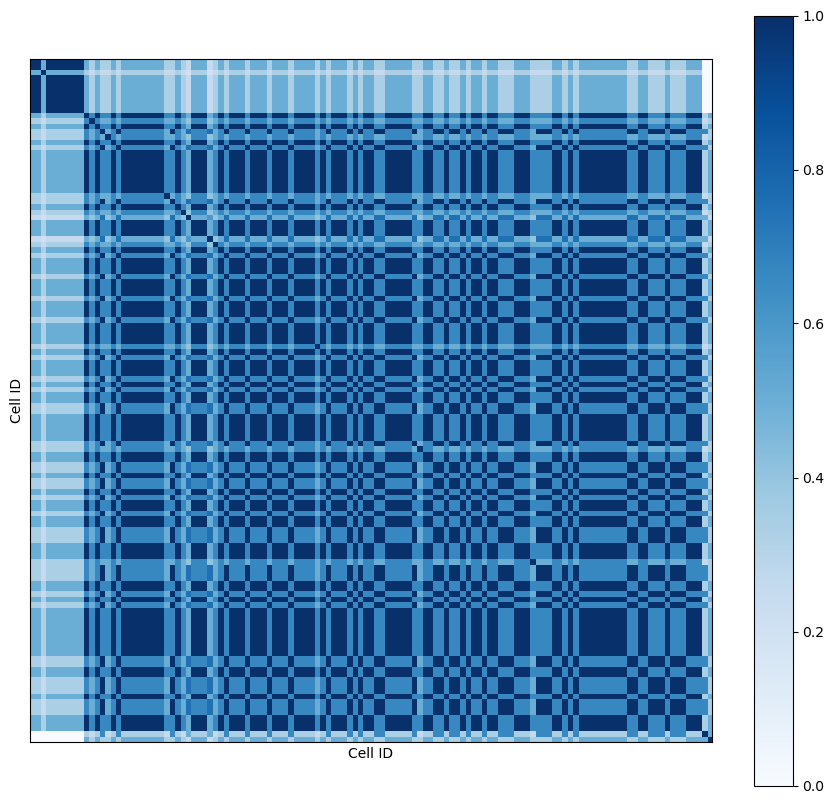

Unnamed: 0
-----------------ACCGCAACCACAC      1
--------------CTCACCGCAACCACAC      1
------GTGGGTTGCAAGGGATGATGTACC      1
----CTAGAACGTGGGTTGCAAGGGAGTAC      1
AGACTTTCACTCGTAAAGATGCCATCCGTT      1
CTAGAACGTGGGTCTCTCTGGTTAGACCAG      1
CTAGAACGTGGGTTGCAAGGGATGATGTAC    125
CTTGGCTTTTTGGTGGGTTGGTGACAACGA      1
GAGTGAGTTAACAACTCACAGCAAAAACAC      1
GAGTGAGTTGATAACTCACCGCAACCACAC     38
GCTTGCTAGCGTTTCCGAATGTTCCAAATC      1
GTATCAACGCAGAGTACATGGGGTCGCGTC      1
TAGCGTATATTCTTCCGGACAGTGTCTGCT      1
TCTTTCAATCGGCAGACAGACCGTCGCGTC    117
dtype: int64
4


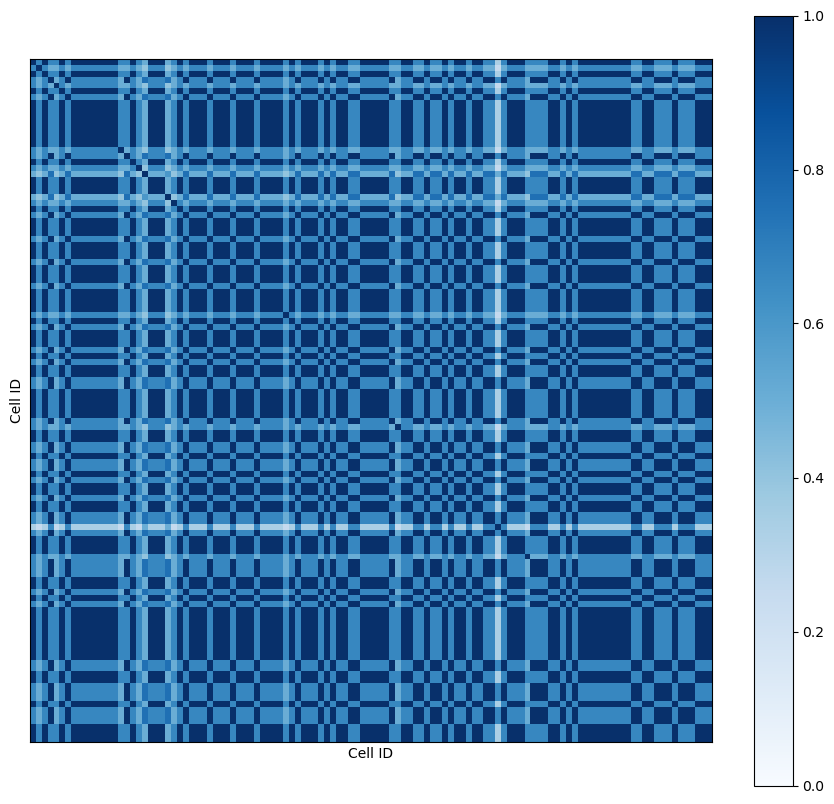

Unnamed: 0
-----------------ACCGCAACCACAC      1
--------------CTCACCGCAACCACAC      1
------GTGGGTTGCAAGGGATGATGTACC      1
----CTAGAACGTGGGTTGCAAGGGAGTAC      1
AGACTTTCACTCGTAAAGATGCCATCCGTT      1
CTAGAACGTGGGTCTCTCTGGTTAGACCAG      1
CTAGAACGTGGGTTGCAAGGGATGATGTAC    115
GAGTGAGTTAACAACTCACAGCAAAAACAC      1
GAGTGAGTTGATAACTCACCGCAACCACAC     38
GCTTGCTAGCGTTTCCGAATGTTCCAAATC      1
GTATCAACGCAGAGTACATGGGGTCGCGTC      1
TAGCGTATATTCTTCCGGACAGTGTCTGCT      1
TCTTTCAATCGGCAGACAGACCGTCGCGTC    116
dtype: int64
5


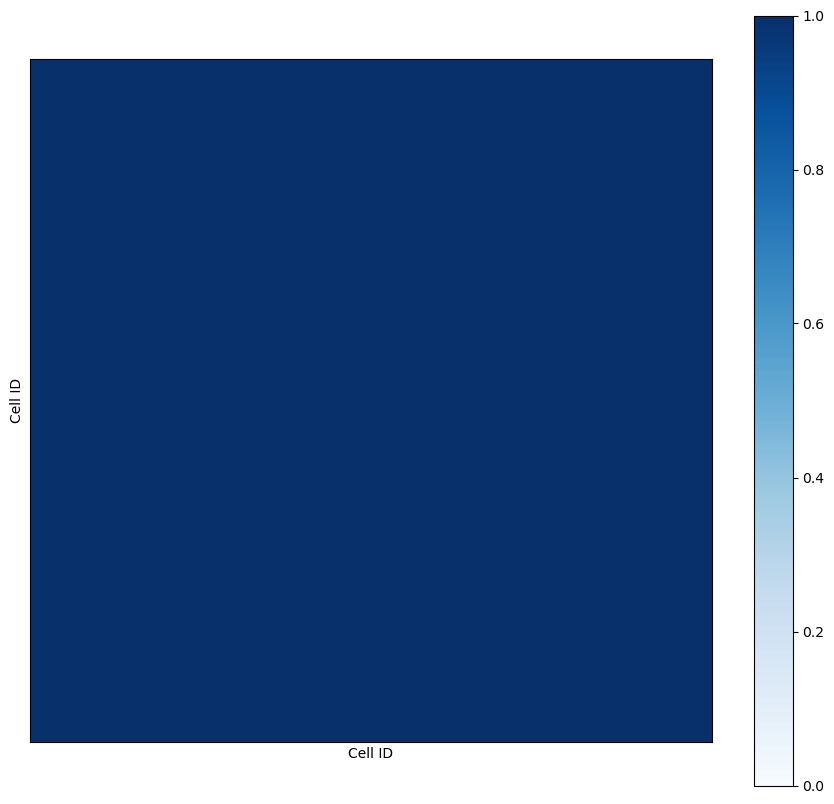

Unnamed: 0
CTAGAACGTGGGTTGCAAGGGATGATGTAC    70
TCTTTCAATCGGCAGACAGACCGTCGCGTC    70
dtype: int64
6


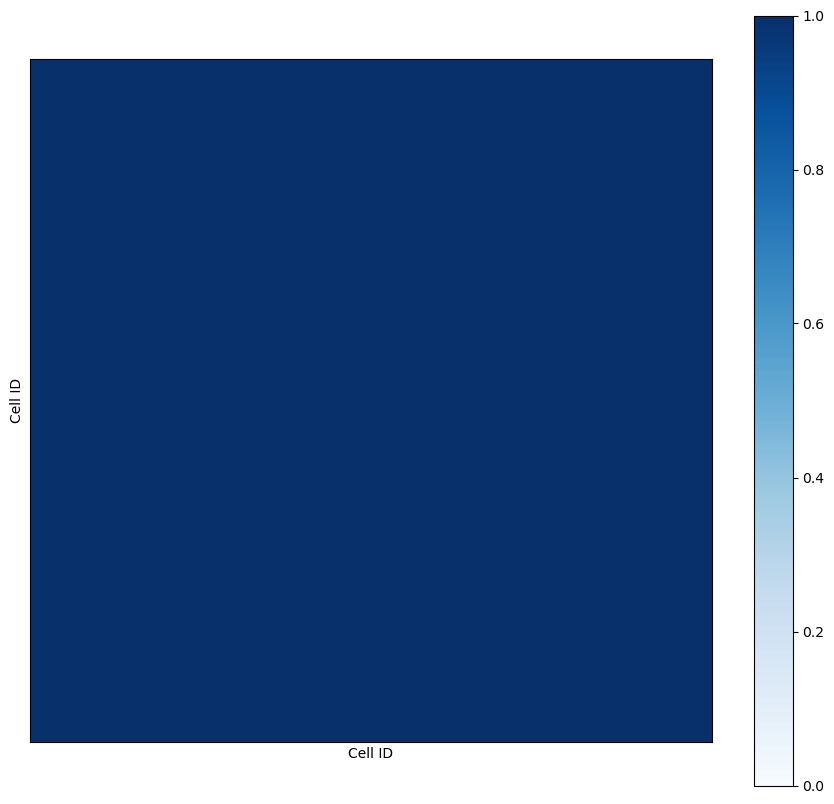

Unnamed: 0
CTAGAACGTGGGTTGCAAGGGATGATGTAC    70
TCTTTCAATCGGCAGACAGACCGTCGCGTC    70
dtype: int64
7


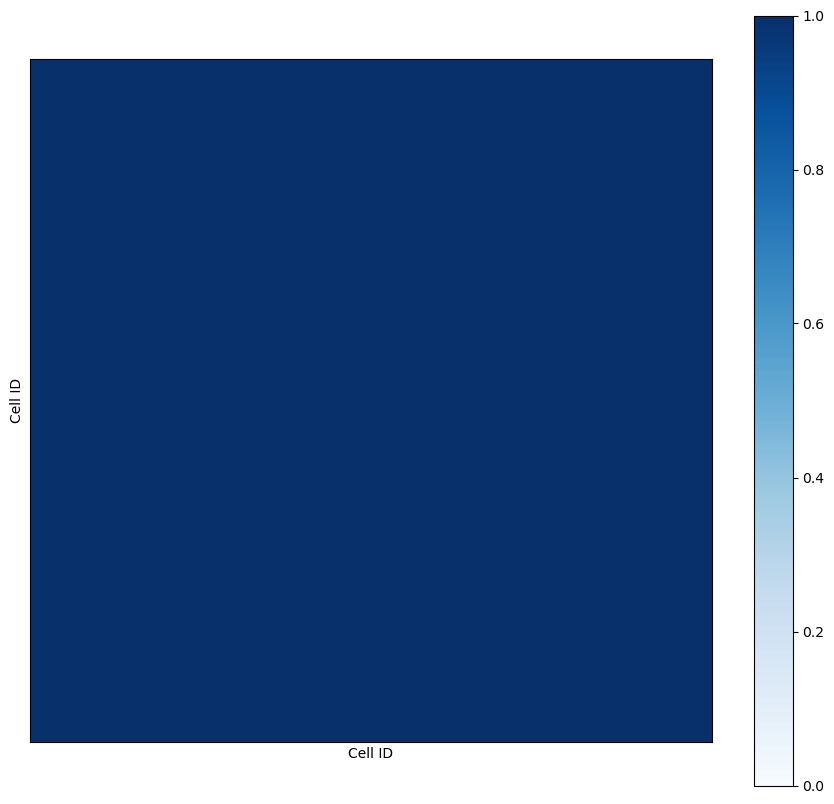

Unnamed: 0
CTAGAACGTGGGTTGCAAGGGATGATGTAC    70
TCTTTCAATCGGCAGACAGACCGTCGCGTC    70
dtype: int64
8


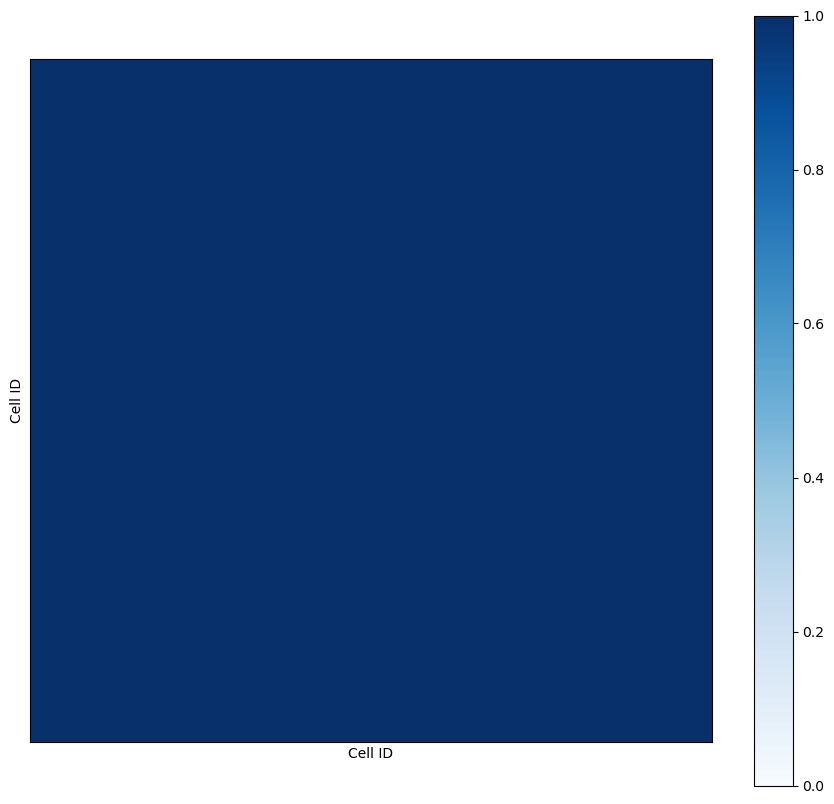

Unnamed: 0
CTAGAACGTGGGTTGCAAGGGATGATGTAC    70
TCTTTCAATCGGCAGACAGACCGTCGCGTC    70
dtype: int64
9


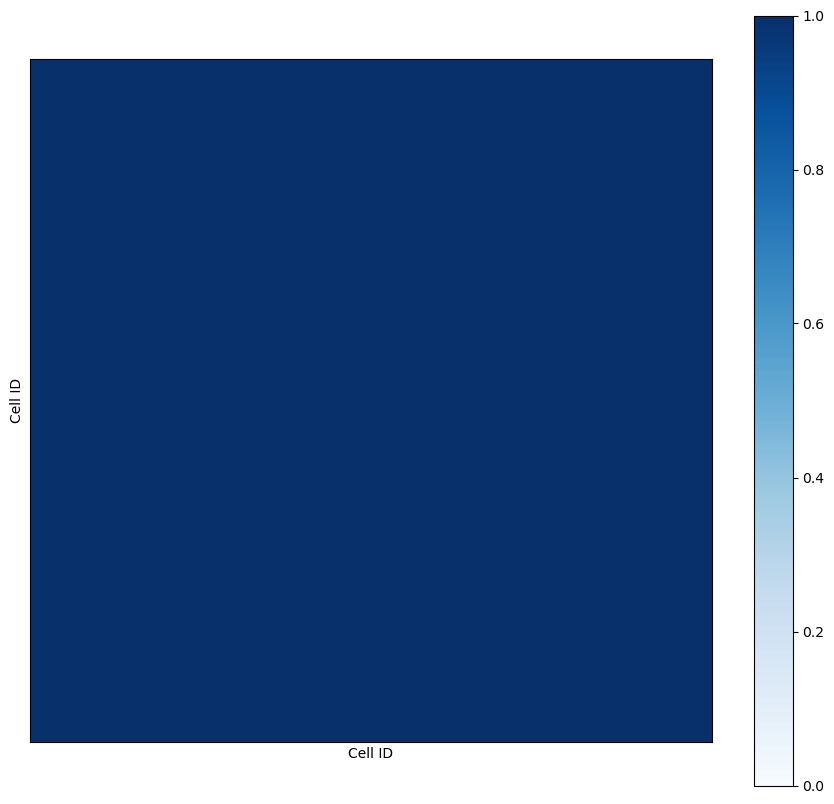

Unnamed: 0
CTAGAACGTGGGTTGCAAGGGATGATGTAC    70
TCTTTCAATCGGCAGACAGACCGTCGCGTC    70
dtype: int64
10


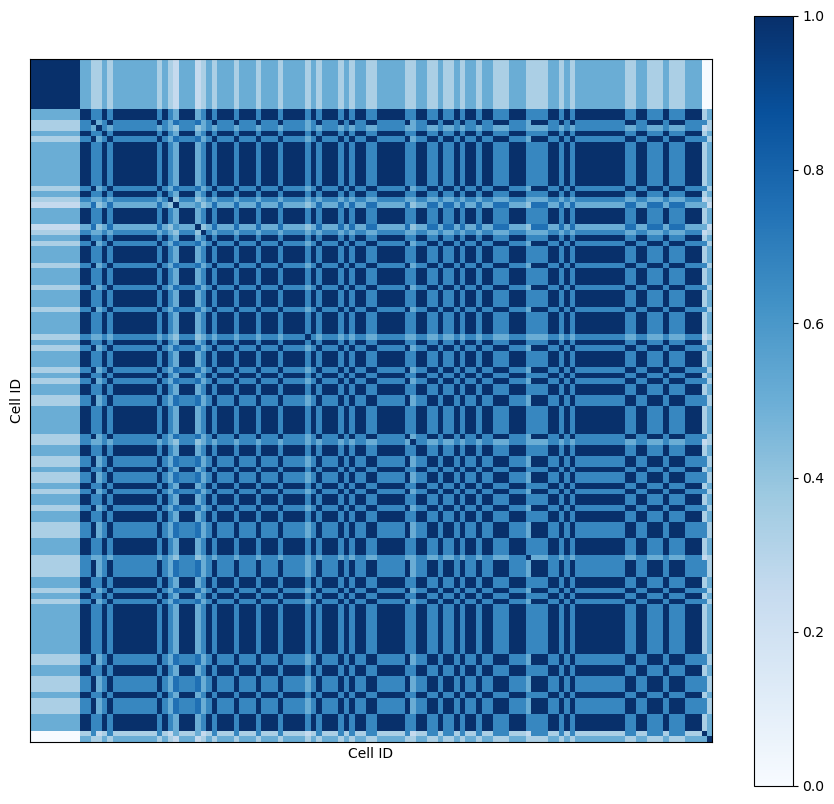

Unnamed: 0
-----------------ACCGCAACCACAC      1
--------------CTCACCGCAACCACAC      1
------GTGGGTTGCAAGGGATGATGTACC      1
----CTAGAACGTGGGTTGCAAGGGAGTAC      1
CTAGAACGTGGGTCTCTCTGGTTAGACCAG      1
CTAGAACGTGGGTTGCAAGGGATGATGTAC    122
GAGTGAGTTAACAACTCACAGCAAAAACAC      1
GAGTGAGTTGATAACTCACCGCAACCACAC     38
GTATCAACGCAGAGTACATGGGGTCGCGTC      1
TAGCGTATATTCTTCCGGACAGTGTCTGCT      1
TCTTTCAATCGGCAGACAGACCGTCGCGTC    115
dtype: int64
20240214_T2_1004
1


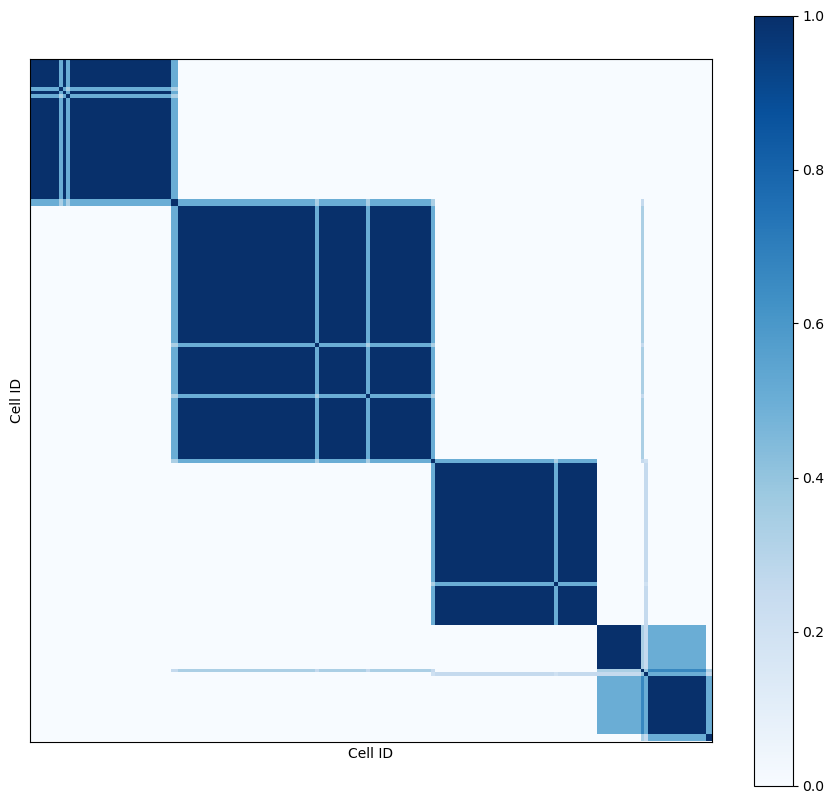

Unnamed: 0
ATCCCGAGATTCTGA---------------     1
CAGTGGTATCAACGCAGAGTACATGGGGCG     1
CGGCAGATCCAGGATGCGTAGTGAACCGCC    41
GCCTTGGCCGGGACCCGGCAGTGGGTTGAC     1
GGCGGGCTTTTAAGCCGGGGAGTTCTTGGA     1
GTATCAACGCAGAGTACATGGGGCGACTAC     1
TGATATCGGAGCGAGCAACGGGGCGACTAC    74
TGCAGAGTTTAAGTACCACTTTTTCCCCTT    30
TGTCCGTATCAATACCCGTCTTCGTTAGCG    47
TGTGTTCATTACTTTTGCATGGCTGTG---     1
TTTCAAGGAAGAAGAGTGTGGGGTACTATT    20
dtype: int64
2


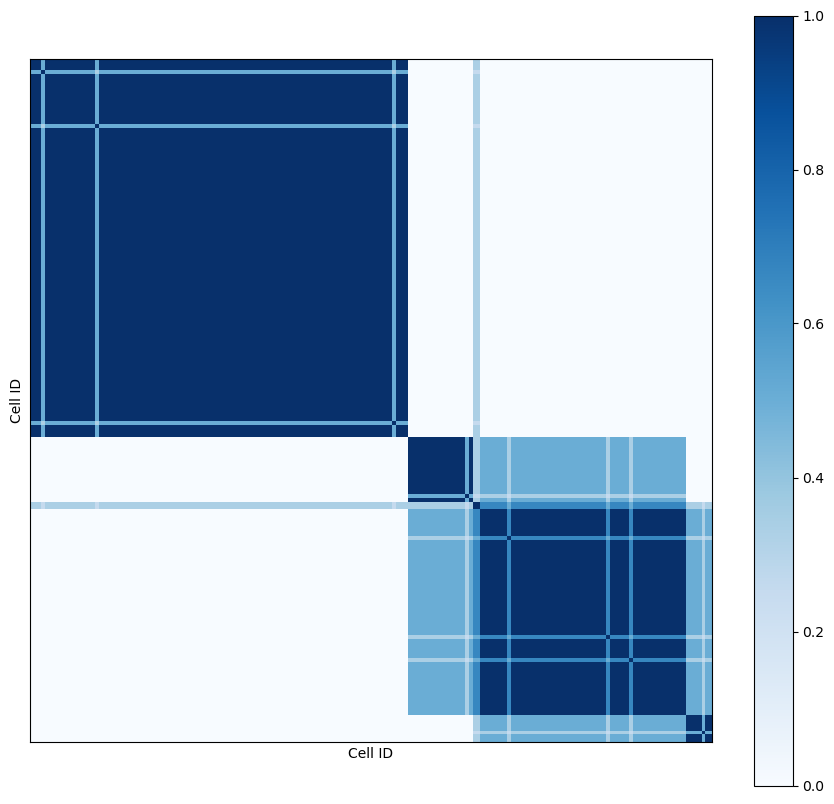

Unnamed: 0
----------------AAAATACTCTTACC      1
CCCCGGTTTCTTGAGTTTATTCTCGCGTAC      1
GCACCCCAGTGAGCATAGGTCCGGGTTTCC      1
GCTAGTATGTGGGCATCCGTCAGTATAATA      1
GTATAACGTGGCTTCTTTCG----------      1
GTATAACGTGGCTTCTTTCGCGCTGAGGGA     63
GTTTGGGTCCACTGAAAAAAAAAAAAAAAA      1
GTTTGGGTCCACTGAAAAAATACTCTTACC     73
TCGAAGGGTCTACTCCTGCATTTGGCTTAC    101
TGATTTTTGTTTAAATCTCGGCTAATGTTT      1
TGCGATGGCCGTGGAACTAGGCCGCGAGAA      1
dtype: int64
3


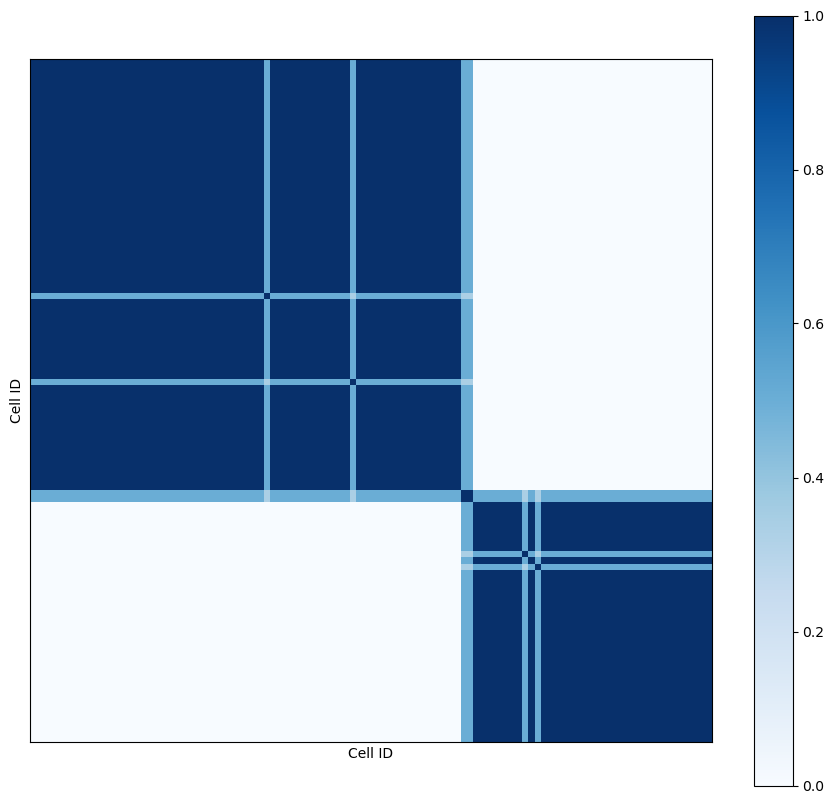

Unnamed: 0
ATCCCGAGATTCTGA---------------     1
CGGCAGATCCAGGATGCGTAGTGAACCGCC    41
GGCGGGCTTTTAAGCCGGGGAGTTCTTGGA     1
GTATCAACGCAGAGTACATGGGGCGACTAC     1
TGATATCGGAGCGAGCAACGGGGCGACTAC    72
TGTGTTCATTACTTTTGCATGGCTGTG---     1
dtype: int64
4


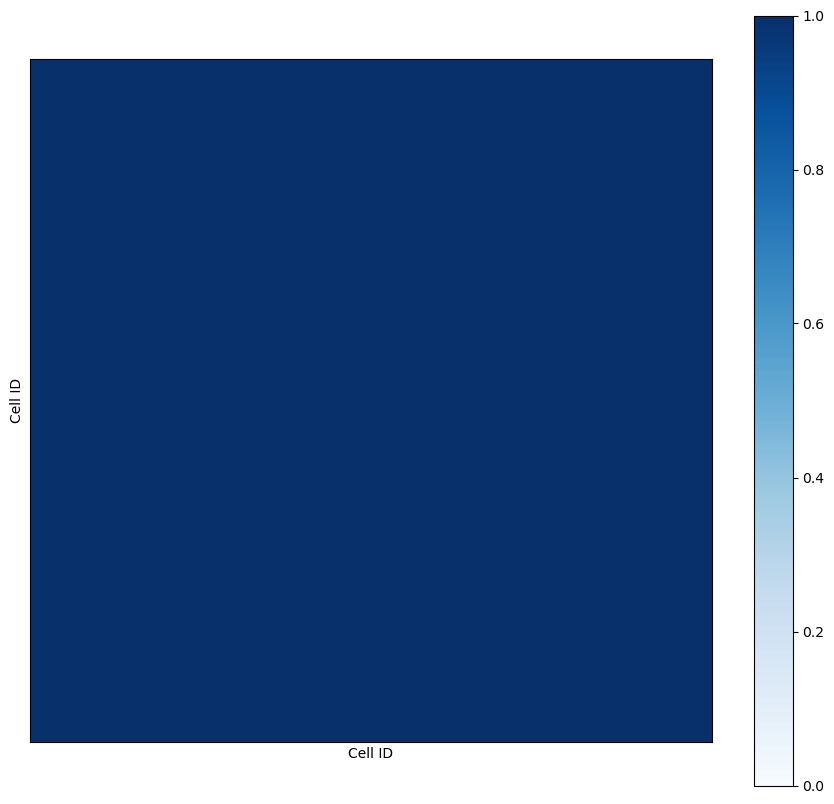

Unnamed: 0
TCGAAGGGTCTACTCCTGCATTTGGCTTAC    96
dtype: int64
5


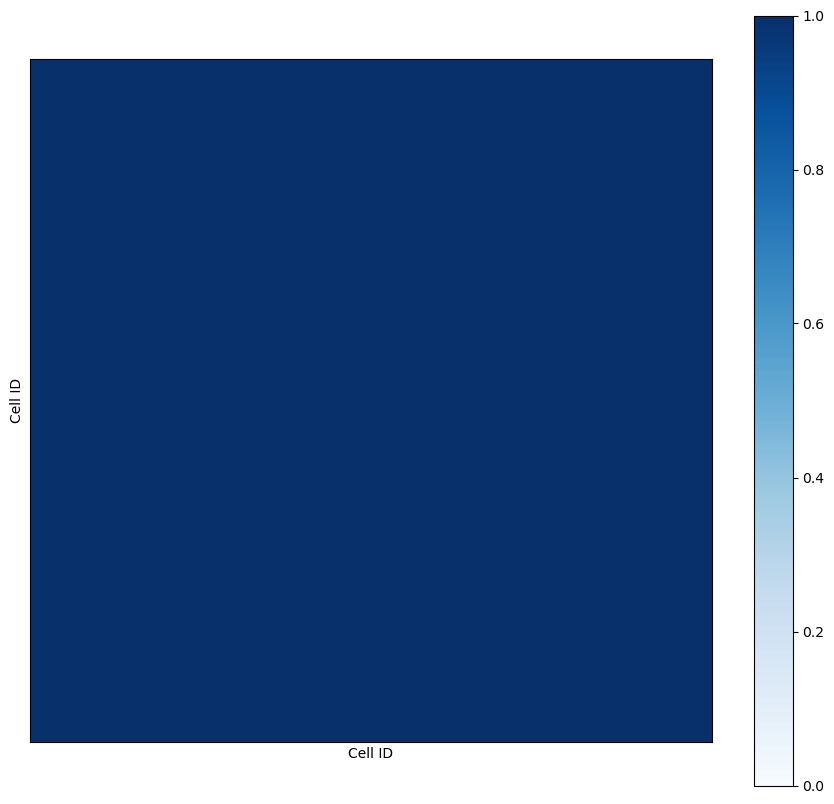

Unnamed: 0
TCGAAGGGTCTACTCCTGCATTTGGCTTAC    96
dtype: int64
6


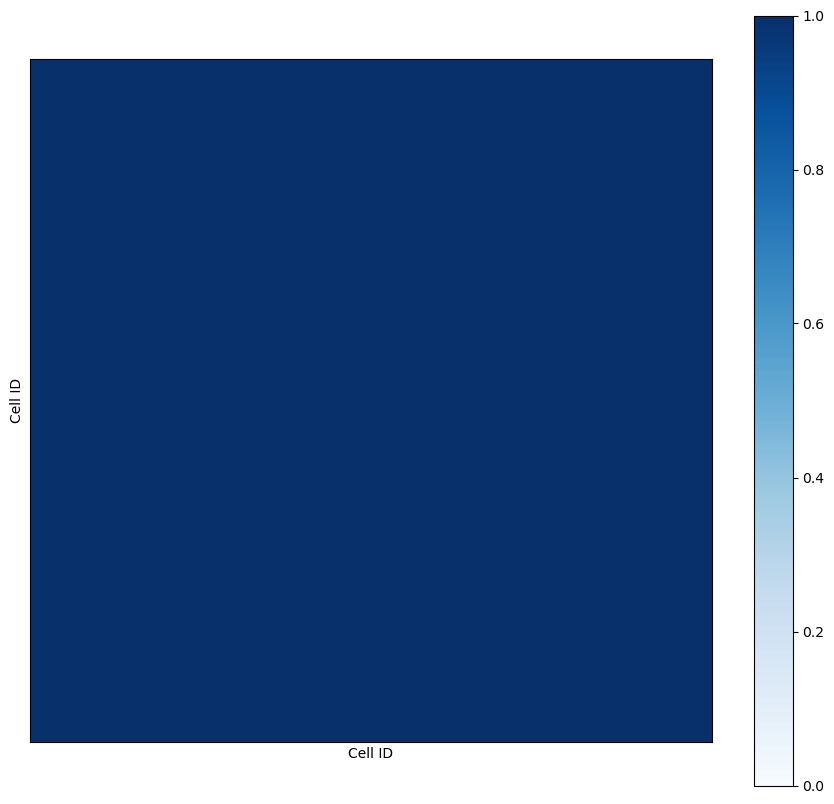

Unnamed: 0
GAGTAATGCAGGGCGGAGTTATTGCGCGTC    96
dtype: int64
7


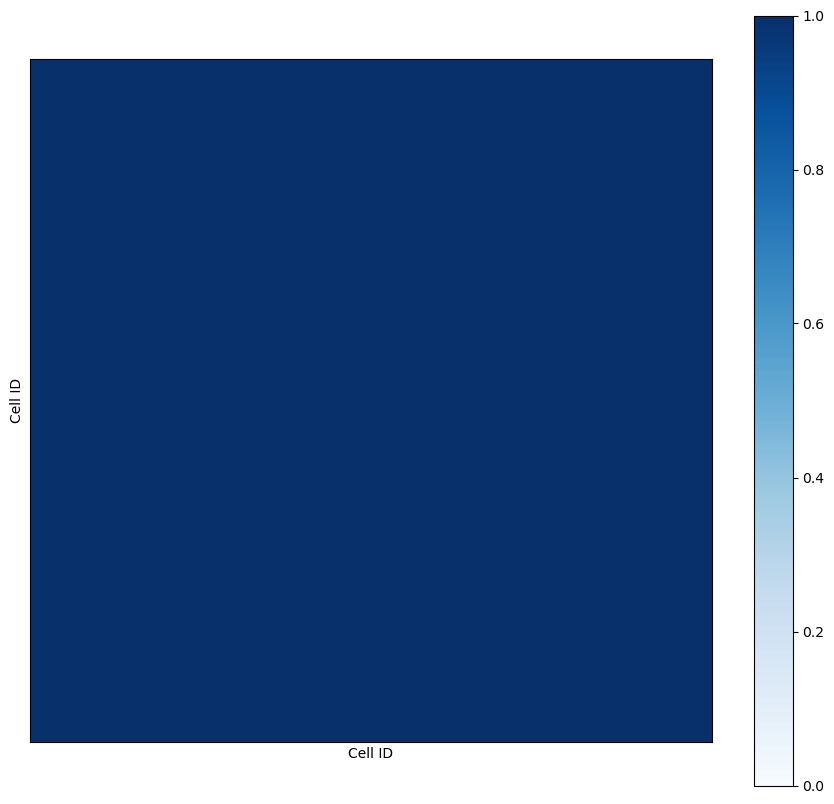

Unnamed: 0
TCGAAGGGTCTACTCCTGCATTTGGCTTAC    96
dtype: int64
8


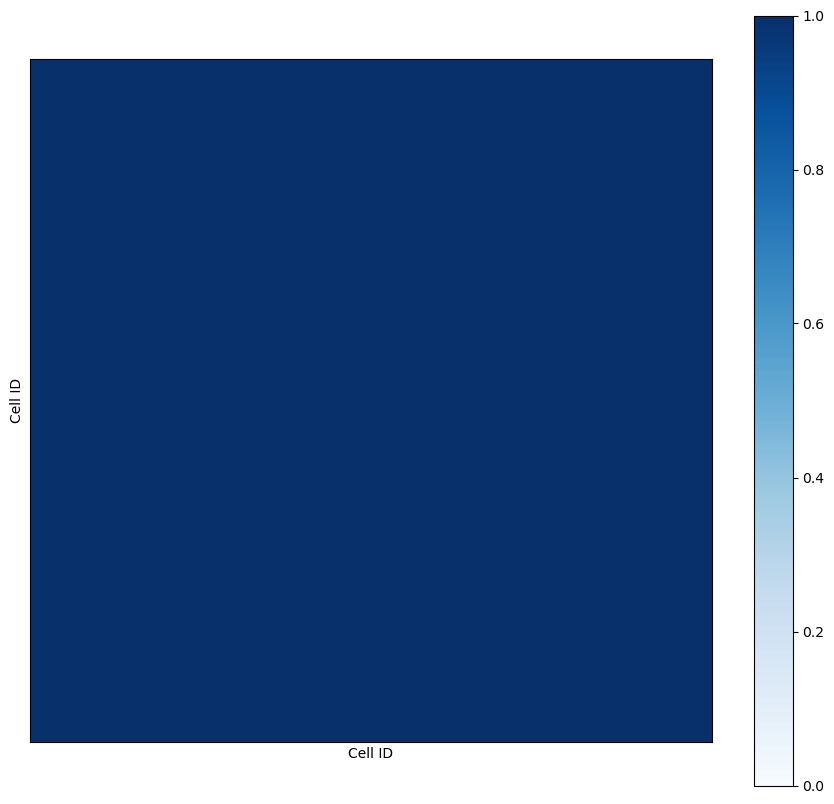

Unnamed: 0
TCGAAGGGTCTACTCCTGCATTTGGCTTAC    96
dtype: int64
9


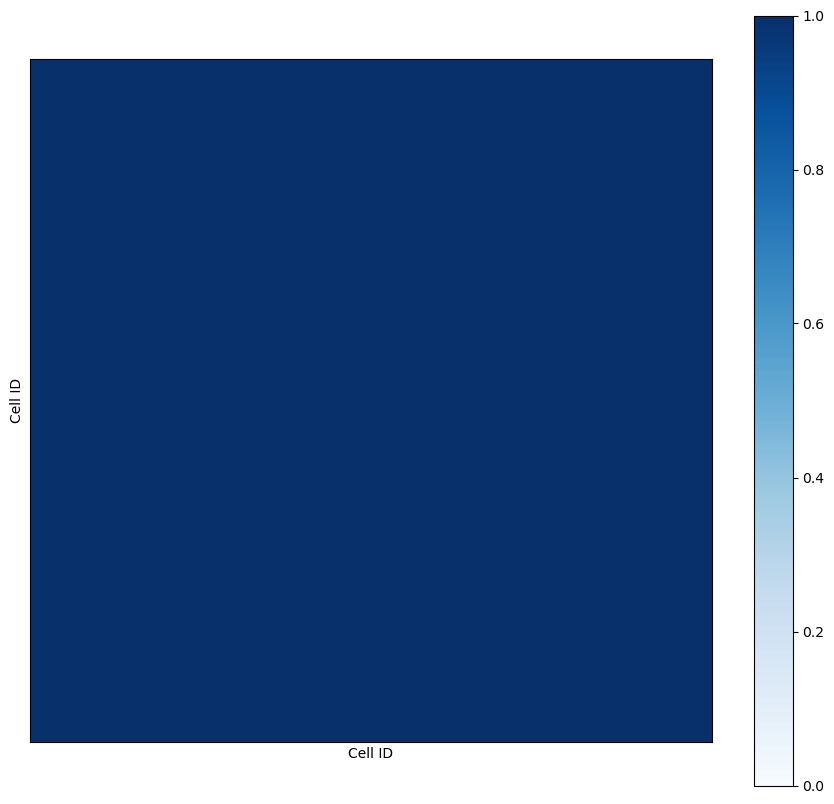

Unnamed: 0
TCGAAGGGTCTACTCCTGCATTTGGCTTAC    96
dtype: int64
10


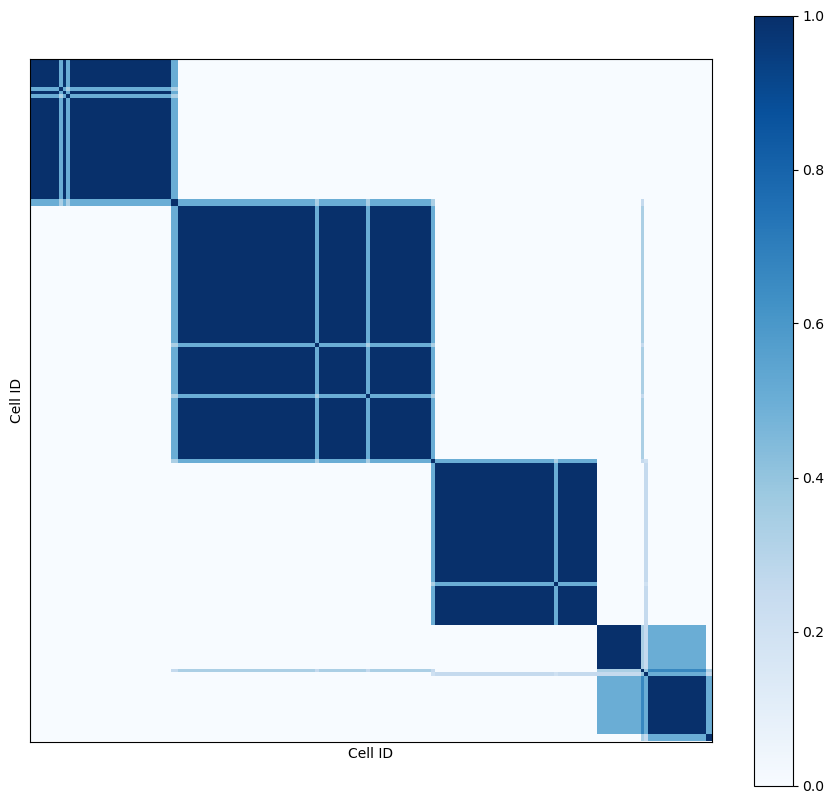

Unnamed: 0
ATCCCGAGATTCTGA---------------     1
CAGTGGTATCAACGCAGAGTACATGGGGCG     1
CGGCAGATCCAGGATGCGTAGTGAACCGCC    41
GCCTTGGCCGGGACCCGGCAGTGGGTTGAC     1
GGCGGGCTTTTAAGCCGGGGAGTTCTTGGA     1
GTATCAACGCAGAGTACATGGGGCGACTAC     1
TGATATCGGAGCGAGCAACGGGGCGACTAC    74
TGCAGAGTTTAAGTACCACTTTTTCCCCTT    30
TGTCCGTATCAATACCCGTCTTCGTTAGCG    47
TGTGTTCATTACTTTTGCATGGCTGTG---     1
TTTCAAGGAAGAAGAGTGTGGGGTACTATT    20
dtype: int64


In [12]:
for this_dataset in datasets:
    print(this_dataset)
    for n, threshold in enumerate(jaccards.keys()):
        print(threshold)
        this_data_dir = DATA_DIR / "_".join([this_dataset, threshold, "output"])
        clones_df = read_clone_ids(this_data_dir)
        selected_cell_ids = clones_df.query(f"clone_nr == {clones_df.clone_nr.value_counts().index[0]}").cell_id.values
        umi_df = read_umi_count_matrix(this_data_dir)
        selected_umi_df = umi_df[selected_cell_ids]
        selected_umi_df = selected_umi_df.loc[~(selected_umi_df==0).all(axis=1)]
        plot_jaccard_matrix(jaccard_similarity_matrix(selected_umi_df))
        plt.show()
        print((selected_umi_df > 0).sum(axis=1))

After checking the Jaccard similarity matrixes for all the different datasets, it looks like Jaccard Threshold of 0.4 is the best for big clones. This can be clearly appreciated when looking into dataset ```T2_1001``` as we can find separate blocks. The other datasets are harder to make a decision. In the particular case of ```T1_1001```, 0.3 might also work for big clones.

On the other hand, a very low Jaccard Threshold might add single doublet cells (not identified by current TREX). This are just single cells, not bridging clones. These cells might have 1 or 2 extra barcodes as previously seen. It may also happen that progeny of cells with two barcodes might have a dropout of 1 barcode. If Jaccard threshold is too high, then we would miss them.